In [1]:
import sys
sys.path.append('../Anlys_mcs/')
from DensDistAnlys import *
from DiffCaptAnlys import *

/home/kevin/anaconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Intial Setup of universe

In [2]:
pdb_files = [
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v1_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/start_drudes.pdb',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/start_drudes.pdb',
]

dcd_files = [
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v1_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/start_drudes.pdb',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/start_drudes.pdb',

]

u_list = [mda.Universe(pdb, dcd) for pdb, dcd in zip(pdb_files, dcd_files)]

grp_AB_list = [u.select_atoms('resname grp and segid A') | u.select_atoms('resname grp and segid B') for u in u_list]
electrode_z_positions_list = [np.array(grp.positions[:, 2]) for grp in grp_AB_list]
num_bins = 120
# dmin, dmax = 0.0, 30.0
# bin_width = 0.25
# n_bins = int(dmax/bin_width)
hist_range_list = [(min(positions), max(positions)) for positions in electrode_z_positions_list]

N113_lists = [u.select_atoms('resname TMP ') for u in u_list]
TFSI_lists = [u.select_atoms('resname Tf2 ') for u in u_list]

Startframe=5000
Endframe=9999

voltage_name= [0, 0.5, 1, 1.5, 2, 2.5, 3, 4]
filenames= ['N1113', 'TFSI']

/home/kevin/anaconda3/envs/py310/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element EP found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/kevin/anaconda3/envs/py310/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: EP
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/kevin/anaconda3/envs/py310/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/kevin/anaconda3/envs/py310/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom

# Density Distribution 

## Whole Molecule density distribution

### 400[N1113][TFSI]

#### Two electrodes in one plot

In [12]:
N113_lists = [u.select_atoms('resname TMP ') for u in u_list]
TFSI_lists = [u.select_atoms('resname Tf2 ') for u in u_list]

Startframe=5000
Endframe=9999
# num_bins = 120
voltage_name= [2, 4, 6, 8, 10, 12]
filenames= ['N1113', 'TFSI']
ddp_list= []

# Loop through components
for i, component in enumerate([N113_lists, TFSI_lists]):
    for j, u in enumerate(u_list):
        ddp = SDD(u, Startframe, Endframe, component[j], hist_range_list[j], num_bins)
        ddp_list = ddp.cal_dens()

        file_name = f'{filenames[i]} Density Profile.dat'
        out_path = f'../sim_output_dir/400[N1113][TFSI]/sim_output_v{voltage_name[j]}_ns100/'
        output_file = os.path.join(out_path, file_name)

        with open(output_file, "w") as file:
            for value in ddp_list:
                file.write(f"{value}\n")



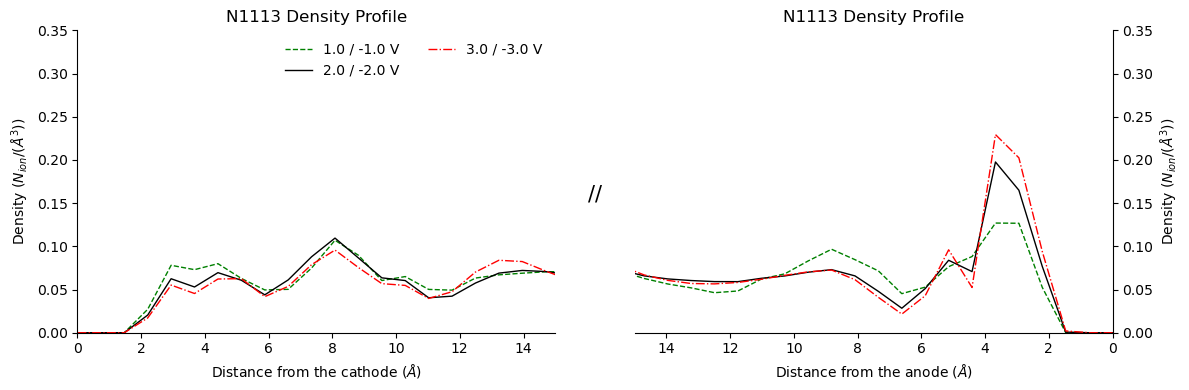

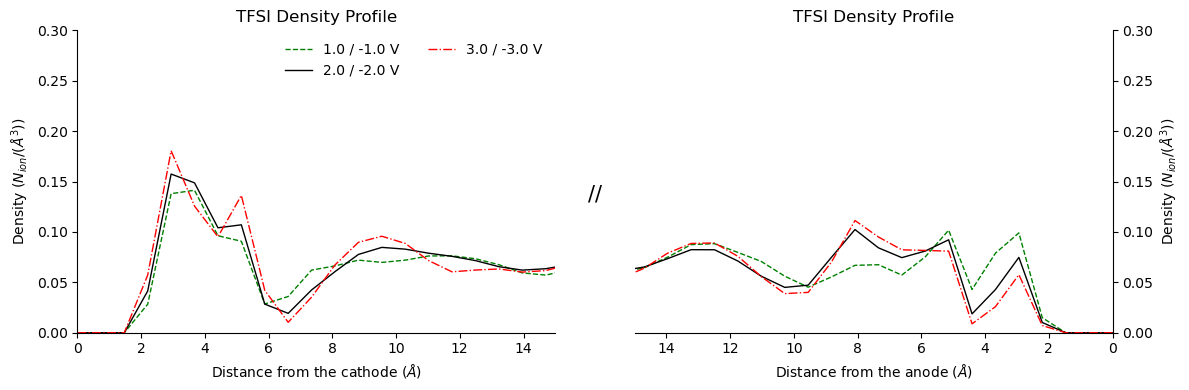

In [14]:
filenames= ['N1113', 'TFSI']
y_lim = [0.35, 0.30]
voltages = [2.0, 4.0, 6.0]
colors = ['g', 'k', 'r']
          
linestyles= ['--', '-', '-.']

# Loop through component names
for i, component_name in enumerate(filenames):
    NTVD = [
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/{component_name} Density Profile.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/{component_name} Density Profile.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v6_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{component_name} Density Profile.dat'
          ]

    NTD_list = []

    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        NTD_list.append(NTVD_lists)


    pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/start_drudes.pdb'
    dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/FV_NVT.dcd'
    u = mda.Universe(pdb_v0, dcd_v0)
    grp_A = u.select_atoms('resname grp and segid A')
    grp_B = u.select_atoms('resname grp and segid B')
    grp_AB = grp_A | grp_B
    electrode_z_positions = np.array(grp_AB.positions[:, 2])
    # midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
    # num_bins = 120
    bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
    vec_x = u.trajectory[0].triclinic_dimensions[0]
    vec_y = u.trajectory[0].triclinic_dimensions[1]
    area = LA.norm(np.cross(vec_x, vec_y))

    density_list = []
    left_densities = []
    right_densities = []
    for j in range(len(NTD_list)):
        density_list.append(NTD_list[j])
        left_densities.append(density_list[j][:num_bins // 2])
        right_densities.append(density_list[j][num_bins // 2:][::-1])

    left_data = left_densities
    right_data = right_densities

    # Use the current y_l value
    y_l = y_lim[i]

    # Use the component_name as the title and output file name
    ddp = DDP(component_name, left_data, right_data, bin_width, x_0=0, x_l=(dmax/2), y_0=0, y_l=y_l)
    ddp.w_m_plot(voltages= voltages, colors =colors, linestyles= linestyles)


#### One electorde one plot

In [ ]:
dmin, dmax = 0.0, 15.0
bin_width = 0.2
n_bins = int(dmax/bin_width)

grp_A_list = [u.select_atoms('resname grp and segid A and name C1') for u in u_list]
grp_B_list = [u.select_atoms('resname grp and segid B and name C1') for u in u_list]


### 400[N1113][OTF]

### 400[N1113][FSI]

### 400[N1113][BF4]

## Functional Groups density distribution

### 400[N1113][TFSI]

#### Two electordes in one plot

In [6]:
TMP_N_list = [u.select_atoms('resname TMP and (name N) ') for u in u_list]
TMP_Methyls_list = [u.select_atoms('resname TMP and (name C or name C1 or name C2 ) ') for u in u_list]


Startframe=5000
Endframe=9999
num_bins = 76
voltage_name= [2, 4, 6, 8, 10, 12]
filenames= ['TMP_N', 'TMP_Methyls']
ddp_list= []

# Loop through components
for i, component in enumerate([TMP_N_list, TMP_Methyls_list]):
    for j, u in enumerate(u_list):
        ddp = SDD(u, Startframe, Endframe, component[j], hist_range_list[j], num_bins)
        ddp_list = ddp.cal_dens()

        file_name = f'{filenames[i]} Density Profile.dat'
        out_path = f'../sim_output_dir/400[N1113][TFSI]/sim_output_v{voltage_name[j]}_ns100/'
        output_file = os.path.join(out_path, file_name)

        with open(output_file, "w") as file:
            for value in ddp_list:
                file.write(f"{value}\n")

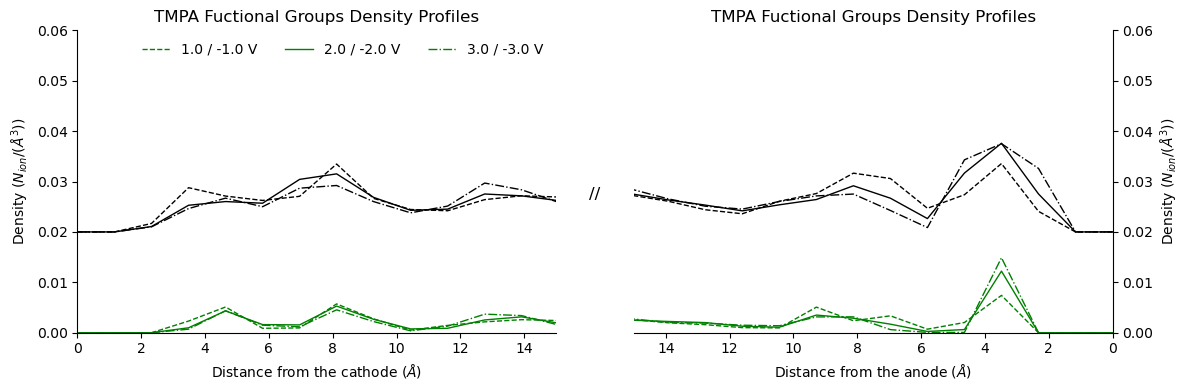

In [7]:
functional_group_filenames = ['TMP_N', 'TMP_Methyls'] # Sequence follow by colors (k= TMP_N, g=TMP_Propy)
voltages = [2.0, 4.0, 6.0]
colors = ['g', 'k', 'r']
          
linestyles= ['--', '-', '-.']
             # '-.', '--'

# Create an instance of DDP for each functional group
ddp_instances = []
for component_name in functional_group_filenames:
    NTVD = [
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/{component_name} Density Profile.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/{component_name} Density Profile.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v6_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{component_name} Density Profile.dat',
          ]

    NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        NTD_list.append(NTVD_lists)

    pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/start_drudes.pdb'
    dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/FV_NVT.dcd'
    u = mda.Universe(pdb_v0, dcd_v0)
    grp_A = u.select_atoms('resname grp and segid A')
    grp_B = u.select_atoms('resname grp and segid B')
    grp_AB = grp_A | grp_B
    electrode_z_positions = np.array(grp_AB.positions[:, 2])
    # midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
    # num_bins = 120
    bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
    # bin_width = 0.25
    vec_x = u.trajectory[0].triclinic_dimensions[0]
    vec_y = u.trajectory[0].triclinic_dimensions[1]
    area = LA.norm(np.cross(vec_x, vec_y))
    density_list = []
    left_densities = []
    right_densities = []
    for k in range(len(NTD_list)):
        density_list.append(NTD_list[k])
        left_densities.append(density_list[k][:num_bins // 2])
        right_densities.append(density_list[k][num_bins // 2:][::-1])

    left_data = left_densities
    right_data = right_densities

    ddp = DDP(component_name, left_data, right_data, bin_width, x_0=0, x_l=15, y_0=0, y_l=0.14)
    ddp_instances.append(ddp)

# Accumulate data for cathode and anode
combined_left_data = [ddp.left_data for ddp in ddp_instances]
combined_right_data = [ddp.right_data for ddp in ddp_instances]

# print(len(combined_right_data[0]))
# Combine all functional groups in one plot
combined_ddp = DDP(component_name, combined_left_data, combined_right_data, bin_width, x_0=0, x_l=15, y_0=0, y_l=0.06)
combined_ddp.f_g_plot(molename='TMPA Fuctional Groups', y_shift= 0.02, voltages= voltages, colors =colors, linestyles= linestyles)

In [10]:
TMP_N_list = [u.select_atoms('resname TMP and (name N) ') for u in u_list]
TMP_Propyl_list = [u.select_atoms('resname TMP and (name C3 or name C4 or name C5) ') for u in u_list]

Startframe=5000
Endframe=9999

voltage_name= [2, 4, 6, 8, 10, 12]
filenames= ['TMP_N', 'TMP_Propy']
ddp_list= []

# Loop through components
for i, component in enumerate([TMP_N_list, TMP_Propyl_list]):
    for j, u in enumerate(u_list):
        ddp = SDD(u, Startframe, Endframe, component[j], hist_range_list[j], num_bins)
        ddp_list = ddp.cal_dens()

        file_name = f'{filenames[i]} Density Profile.dat'
        out_path = f'../sim_output_dir/400[N1113][TFSI]/sim_output_v{voltage_name[j]}_ns100/'
        output_file = os.path.join(out_path, file_name)

        with open(output_file, "w") as file:
            for value in ddp_list:
                file.write(f"{value}\n")

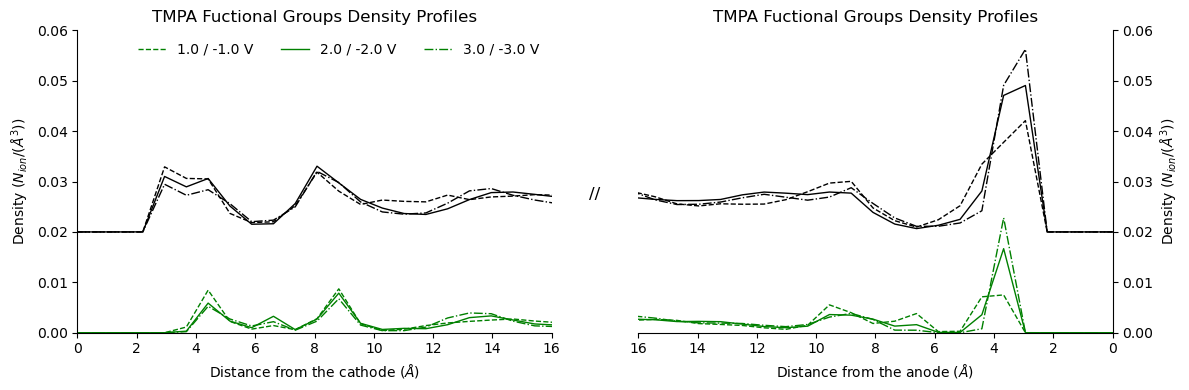

In [12]:
functional_group_filenames = ['TMP_N', 'TMP_Propy'] # Sequence follow by colors (k= TMP_N, g=TMP_Propy)
voltages = [2.0, 4.0, 6.0]
colors = ['g', 'k', 'r']
          
linestyles= ['--', '-', '-.']
             # '-.', '--'

# Create an instance of DDP for each functional group
ddp_instances = []
for component_name in functional_group_filenames:
    NTVD = [
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/{component_name} Density Profile.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/{component_name} Density Profile.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v6_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{component_name} Density Profile.dat',
          ]

    NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        NTD_list.append(NTVD_lists)

    pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/start_drudes.pdb'
    dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/FV_NVT.dcd'
    u = mda.Universe(pdb_v0, dcd_v0)
    grp_A = u.select_atoms('resname grp and segid A')
    grp_B = u.select_atoms('resname grp and segid B')
    grp_AB = grp_A | grp_B
    electrode_z_positions = np.array(grp_AB.positions[:, 2])
    midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
    num_bins = 120
    bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
    vec_x = u.trajectory[0].triclinic_dimensions[0]
    vec_y = u.trajectory[0].triclinic_dimensions[1]
    area = LA.norm(np.cross(vec_x, vec_y))
    density_list = []
    left_densities = []
    right_densities = []
    for k in range(len(NTD_list)):
        density_list.append(NTD_list[k])
        left_densities.append(density_list[k][:num_bins // 2])
        right_densities.append(density_list[k][num_bins // 2:][::-1])

    left_data = left_densities
    right_data = right_densities

    ddp = DDP(component_name, left_data, right_data, bin_width, x_0=0, x_l=16, y_0=0, y_l=0.14)
    ddp_instances.append(ddp)

# Accumulate data for cathode and anode
combined_left_data = [ddp.left_data for ddp in ddp_instances]
combined_right_data = [ddp.right_data for ddp in ddp_instances]

# print(len(combined_right_data[0]))
# Combine all functional groups in one plot
combined_ddp = DDP(component_name, combined_left_data, combined_right_data, bin_width, x_0=0, x_l=16, y_0=0, y_l=0.06)
combined_ddp.f_g_plot(molename='TMPA Fuctional Groups', y_shift= 0.02, voltages= voltages, colors =colors, linestyles= linestyles)

In [11]:
TFSI_N_list = [u.select_atoms('resname Tf2 and (name Stf or name Stf1) ') for u in u_list]
TFSI_CF3_list = [u.select_atoms('resname Tf2 and (name Ctf or name Ctf1)') for u in u_list]

Startframe=8000
Endframe=9999

voltage_name= [2, 4, 6, 8, 10, 12]
filenames= ['TFSI_S', 'TFSI_CF3']
ddp_list= []

# Loop through components
for i, component in enumerate([TFSI_N_list, TFSI_CF3_list]):
    for j, u in enumerate(u_list):
        ddp = SDD(u, Startframe, Endframe, component[j], hist_range_list[j], num_bins)
        ddp_list = ddp.cal_dens()

        file_name = f'{filenames[i]} Density Profile.dat'
        out_path = f'../sim_output_dir/400[N1113][TFSI]/sim_output_v{voltage_name[j]}_ns100/'
        output_file = os.path.join(out_path, file_name)

        with open(output_file, "w") as file:
            for value in ddp_list:
                file.write(f"{value}\n")

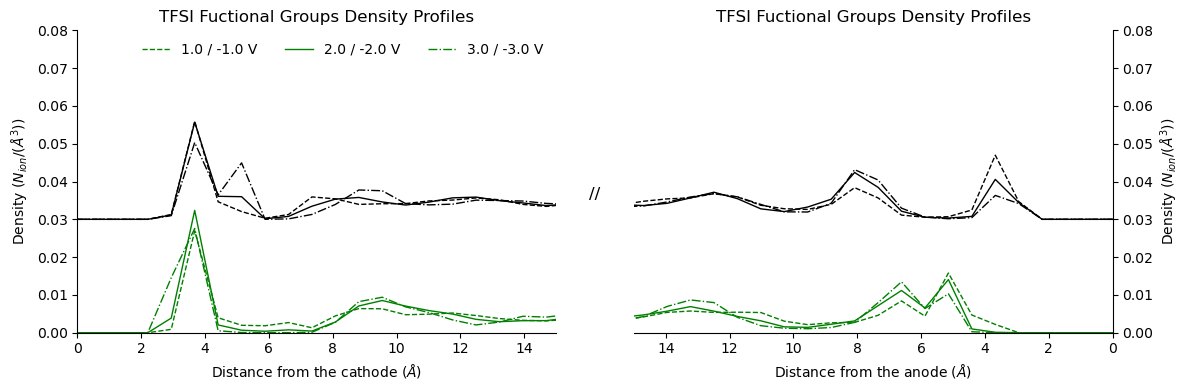

In [32]:
functional_group_filenames = ['TFSI_S', 'TFSI_CF3']
voltages = [2.0, 4.0, 6.0]
colors = ['g', 'k', 'r']
          
linestyles= ['--', '-', '-.']
             # '-.', '--'

# Create an instance of DDP for each functional group
ddp_instances = []
for component_name in functional_group_filenames:
    NTVD = [
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/{component_name} Density Profile.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/{component_name} Density Profile.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v6_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{component_name} Density Profile.dat'
          ]

    NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        NTD_list.append(NTVD_lists)

    pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/start_drudes.pdb'
    dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/FV_NVT.dcd'
    u = mda.Universe(pdb_v0, dcd_v0)
    grp_A = u.select_atoms('resname grp and segid A')
    grp_B = u.select_atoms('resname grp and segid B')
    grp_AB = grp_A | grp_B
    electrode_z_positions = np.array(grp_AB.positions[:, 2])
    midpoint = (max(electrode_z_positions) + min(electrode_z_positions)) / 2.0
    num_bins = 120
    bin_width = (max(electrode_z_positions) - min(electrode_z_positions)) / num_bins
    vec_x = u.trajectory[0].triclinic_dimensions[0]
    vec_y = u.trajectory[0].triclinic_dimensions[1]
    area = LA.norm(np.cross(vec_x, vec_y))
    density_list = []
    left_densities = []
    right_densities = []
    for k in range(len(NTD_list)):
        density_list.append(NTD_list[k])
        left_densities.append(density_list[k][:num_bins // 2])
        right_densities.append(density_list[k][num_bins // 2:][::-1])

    left_data = left_densities
    right_data = right_densities

    ddp = DDP(component_name, left_data, right_data, bin_width, x_0=0, x_l=16, y_0=0, y_l=0.14)
    ddp_instances.append(ddp)

# Accumulate data for cathode and anode
combined_left_data = [ddp.left_data for ddp in ddp_instances]
combined_right_data = [ddp.right_data for ddp in ddp_instances]

# print(len(combined_right_data[0]))
# Combine all functional groups in one plot
combined_ddp = DDP(component_name, combined_left_data, combined_right_data, bin_width, x_0=0, x_l=15, y_0=0, y_l=0.08)
combined_ddp.f_g_plot(molename='TFSI Fuctional Groups', y_shift= 0.03, voltages= voltages, colors =colors, linestyles= linestyles)

#### One electrode one plot (Anode)

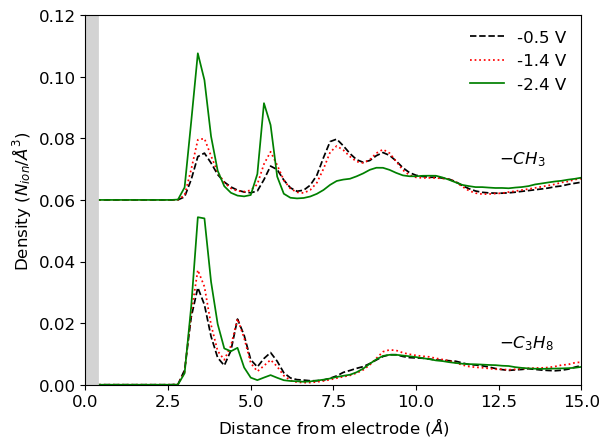

In [3]:
functional_group_filenames = ['TMP_Propyl', 'TMP_Methyls'] # Sequence follow by colors (k= TMP_N, g=TMP_Propy)
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']
colors = ['k', 'r', 'g']

# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']

dmin, dmax = 0.0, 15.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
y_lim = 0.12
# rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
# edges = 0.5 * (edges[1:] + edges[:-1])
# newedge = numpy.array(edges)

# Create an instance of DDP for each functional group
ddp_instances = DDP_oneside(bin_width, dmax, y_lim)
NTD_list = []

# Read data from files and store in NTD_list
for component_name in functional_group_filenames:
    NTVD = [
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/{component_name} Density Profile at Anode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/{component_name} Density Profile at Anode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        # Uncomment and add more paths if needed
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{component_name} Density Profile.dat',
    ]

    component_NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        component_NTD_list.append(NTVD_lists)
    NTD_list.append(component_NTD_list)

fg_names=['$-C_{3}H_{8}$', '$-CH_{3}$']
# Call the function to plot the data
ddp_instances.f_g_plot_oneside( 6, 0.012, 0.06, NTD_list, V_drops_anod, colors, linestyles, fg_names)

### At cathode

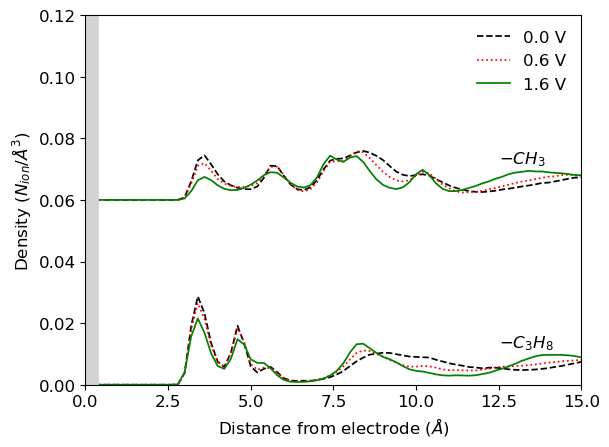

In [6]:
functional_group_filenames = ['TMP_Propyl', 'TMP_Methyls'] # Sequence follow by colors (k= TMP_N, g=TMP_Propy)
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
# colors = ['g', 'k', 'b', 'r','c', 'm']
colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']

dmin, dmax = 0.0, 15.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
y_lim = 0.12
# rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
# edges = 0.5 * (edges[1:] + edges[:-1])
# newedge = numpy.array(edges)

# Create an instance of DDP for each functional group
ddp_instances = DDP_oneside(bin_width, dmax, y_lim)
NTD_list = []

# Read data from files and store in NTD_list
for component_name in functional_group_filenames:
    NTVD = [
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        # Uncomment and add more paths if needed
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{component_name} Density Profile.dat',
    ]

    component_NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        component_NTD_list.append(NTVD_lists)
    NTD_list.append(component_NTD_list)

fg_names=['$-C_{3}H_{8}$', '$-CH_{3}$']
# Call the function to plot the data
ddp_instances.f_g_plot_oneside( 6, 0.012, 0.06, NTD_list, V_drops_cat, colors, linestyles, fg_names)

### At Cathode

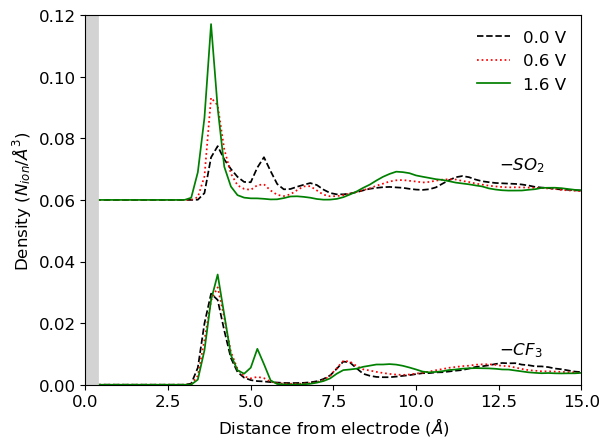

In [4]:
functional_group_filenames = ['TFSI_CF3', 'TFSI_S']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
# colors = ['g', 'k', 'b', 'r','c', 'm']
colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']

# Create an instance of DDP for each functional group
dmin, dmax = 0.0, 15.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
y_lim = 0.12
# rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
# edges = 0.5 * (edges[1:] + edges[:-1])
# newedge = numpy.array(edges)

# Create an instance of DDP for each functional group
ddp_instances = DDP_oneside(bin_width, dmax, y_lim)
NTD_list = []

# Read data from files and store in NTD_list
for component_name in functional_group_filenames:
    NTVD = [
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        # Uncomment and add more paths if needed
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{component_name} Density Profile.dat',
    ]

    component_NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        component_NTD_list.append(NTVD_lists)
    NTD_list.append(component_NTD_list)

fg_names=['$-CF_{3}$', '$-SO_{2}$']
# Call the function to plot the data
ddp_instances.f_g_plot_oneside( 6, 0.01, 0.06, NTD_list, V_drops_cat, colors, linestyles, fg_names)

### At Anode

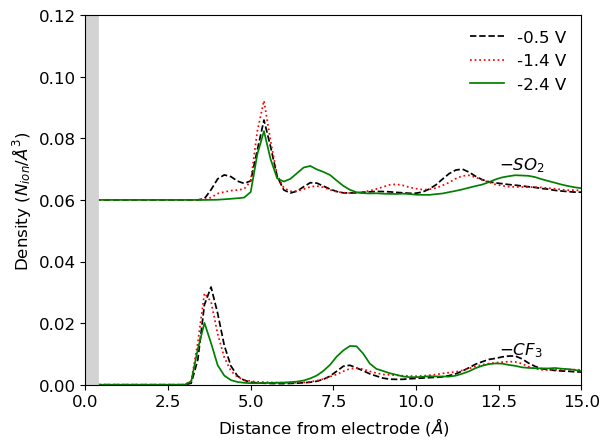

In [7]:
functional_group_filenames = ['TFSI_CF3', 'TFSI_S']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']
colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']

# Create an instance of DDP for each functional group
dmin, dmax = 0.0, 15.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
y_lim = 0.12
# rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
# edges = 0.5 * (edges[1:] + edges[:-1])
# newedge = numpy.array(edges)

# Create an instance of DDP for each functional group
ddp_instances = DDP_oneside(bin_width, dmax, y_lim)
NTD_list = []

# Read data from files and store in NTD_list
for component_name in functional_group_filenames:
    NTVD = [
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{component_name} Density Profile at Cathode.dat',
        f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{component_name} Density Profile at Anode.dat',
        # Uncomment and add more paths if needed
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{component_name} Density Profile.dat',
        # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{component_name} Density Profile.dat',
    ]

    component_NTD_list = []
    for j in range(len(NTVD)):
        NTVD_list = NTD(NTVD[j])
        NTVD_lists = NTVD_list.NTDV_list()
        component_NTD_list.append(NTVD_lists)
    NTD_list.append(component_NTD_list)

fg_names=['$-CF_{3}$', '$-SO_{2}$']
# Call the function to plot the data
ddp_instances.f_g_plot_oneside( 6, 0.01, 0.06, NTD_list, V_drops_anod, colors, linestyles, fg_names)

### 400[N1113][OTF]

### 400[N1113][FSI]

### 400[N1113][BF4]

## Radial Distribution plot

### capped_distance

#### RDFs of adsorbed ion1_i with all other ions

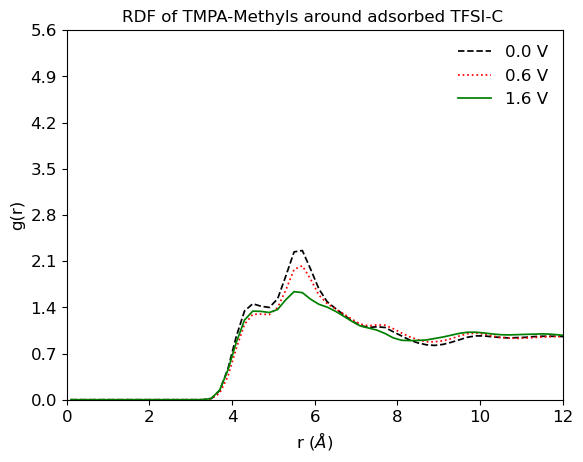

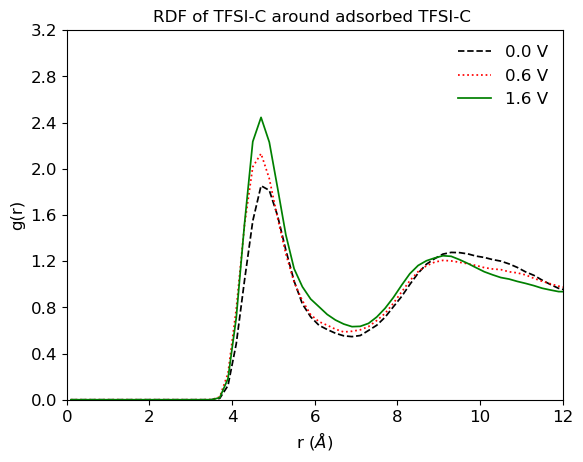

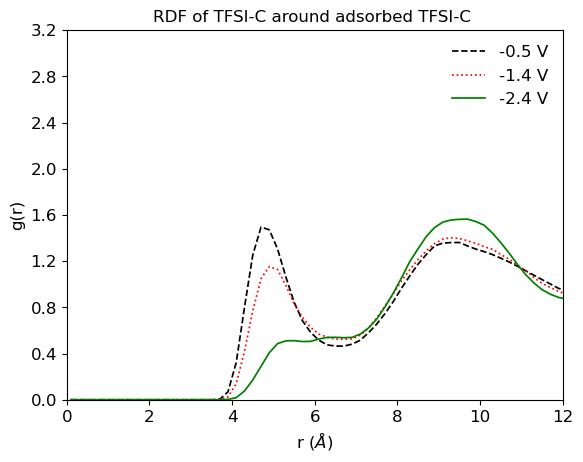

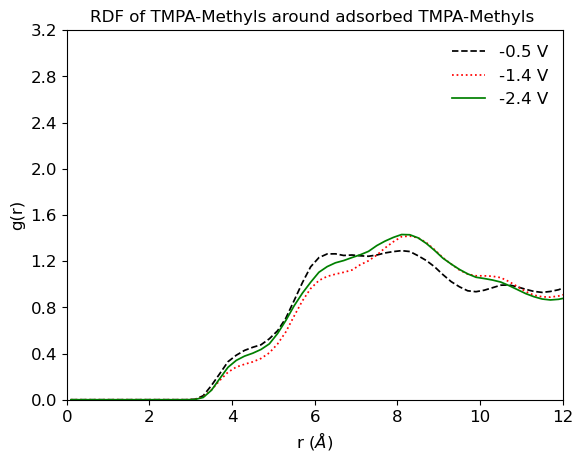

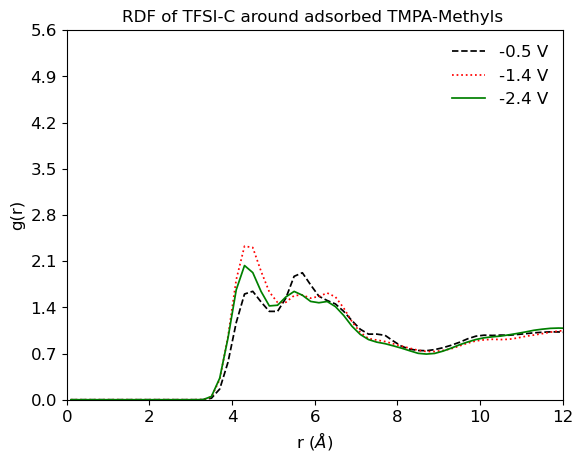

In [6]:
filenames= ['TMPA_methyls-TFSI_C', 'TFSI_C-TFSI_C', 'TFSI_C-TFSI_C_anod', 'TMPA_methyls-TMPA_methyls', 'TFSI_C-TMPA_methyls']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']


anion_name_C = 'TFSI-C' 
anion_name_S = 'TFSI-S'
cation_name_N= 'TMPA-N'
cation_name_methyl = 'TMPA-Methyls'
cation_name_Propyl = 'TMPA-Pro'


dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 ######
RDFs_dats_CaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[0]} RDFs.dat',
      ]

RDFs_dats_AaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[1]} RDFs.dat',
      ]

RDFs_dats_AaA_anod = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[2]} RDFs.dat',
      ]

RDFs_dats_CaC = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[3]} RDFs.dat',

      ]

RDFs_dats_AaC_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[4]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[4]} RDFs.dat',

      ]


RDFs_list_CaA_C = []
RDFs_list_AaA_C = []
RDFs_list_AaA_anod = []
RDFs_list_CaC = []
RDFs_list_AaC_C = []


for i in range(len(RDFs_dats_CaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,cation_name_methyl)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_CaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,anion_name_C)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_AaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaA_anod)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaA_anod[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaA_anod.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,anion_name_C)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_AaA_anod, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_CaC)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC.append(RDFs_dat_lists)

RDFs= RPS(cation_name_methyl, cation_name_methyl)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_CaC, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_AaC_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC_C.append(RDFs_dat_lists)

RDFs= RPS(cation_name_methyl, anion_name_C)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_AaC_C, V_drops_anod, colors, linestyles)

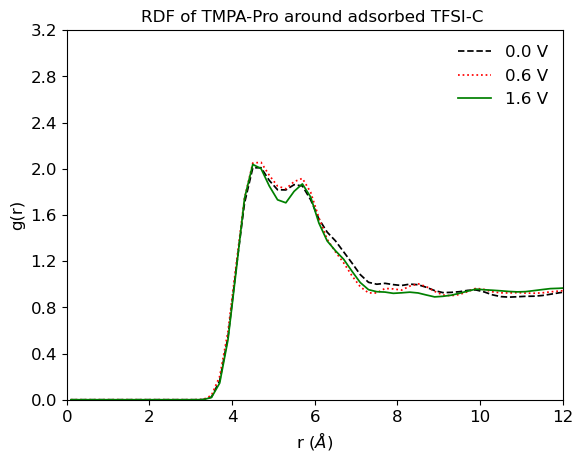

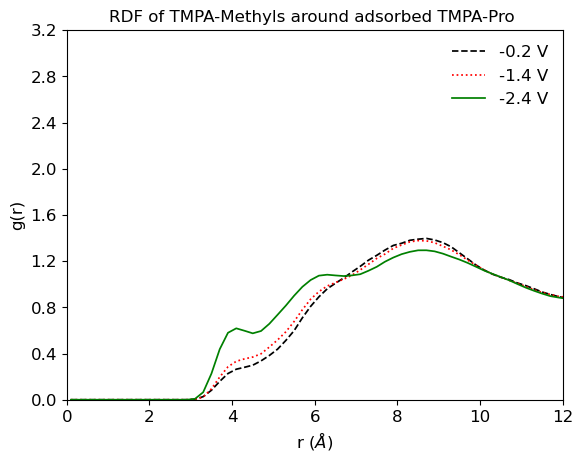

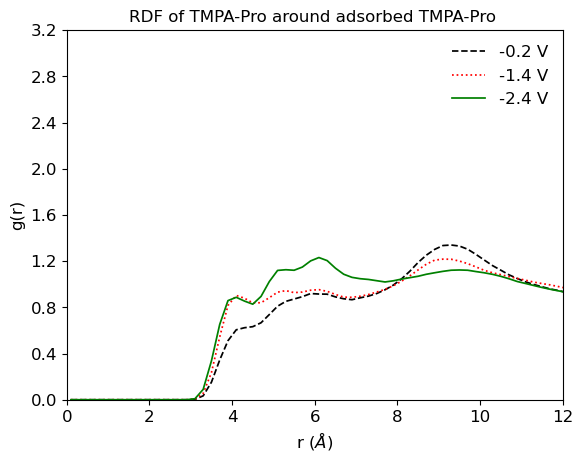

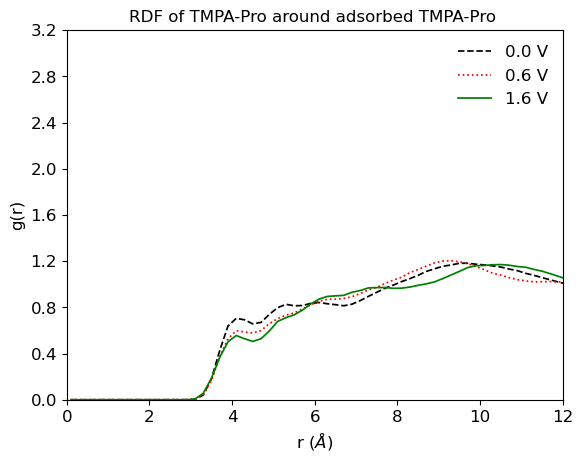

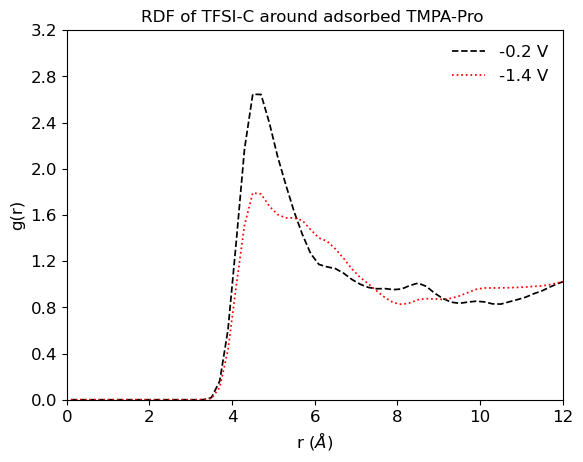

In [7]:
filenames_pro= ['TMPA_propyl-TFSI_C', 'TMPA_methyls-TMPA_propyl', 'TMPA_propyl-TMPA_propyl', 'TMPA_propyl-TMPA_propyl_cat', 'TFSI_C-TMPA_propyl']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.2, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']
anion_name_C = 'TFSI-C' 
cation_name_Propyl = 'TMPA-Pro'
cation_name_Methyls = 'TMPA-Methyls'

dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 #######
RDFs_dats_CaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/AnaRes/{filenames[0]} RDFs.dat'
      ]

RDFs_dats_CaC_Alkyls_M_P = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]


RDFs_dats_CaC_Pro = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_dats_CaC_Pro_cat = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_dats_AaC_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_list_CaA_C = []
RDFs_list_CaC_Pro = []
RDFs_list_CaC_Pro_cat = []
RDFs_list_CaC_Alkyls_M_P=[]
RDFs_list_CaC_Alkyls_P_M=[]
RDFs_list_AaC_C = []


for i in range(len(RDFs_dats_CaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,cation_name_Propyl)
RDFs.plot_rdfs_12(12, 3.2, newedge, RDFs_list_CaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_CaC_Alkyls_M_P)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Alkyls_M_P[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Alkyls_M_P.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Methyls)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_CaC_Alkyls_M_P, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_CaC_Pro)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Pro[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Pro.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Propyl)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_CaC_Pro, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_CaC_Pro_cat)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Pro_cat[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Pro_cat.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Propyl)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_CaC_Pro_cat, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaC_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC_C.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, anion_name_C)
RDFs.plot_rdfs_12(12, 3.2, newedge, RDFs_list_AaC_C, V_drops_anod, colors, linestyles)


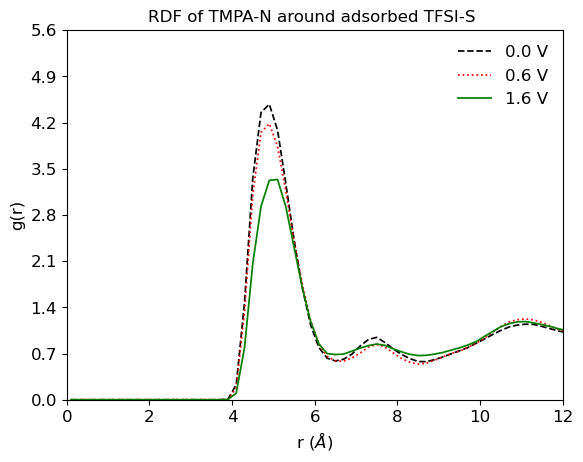

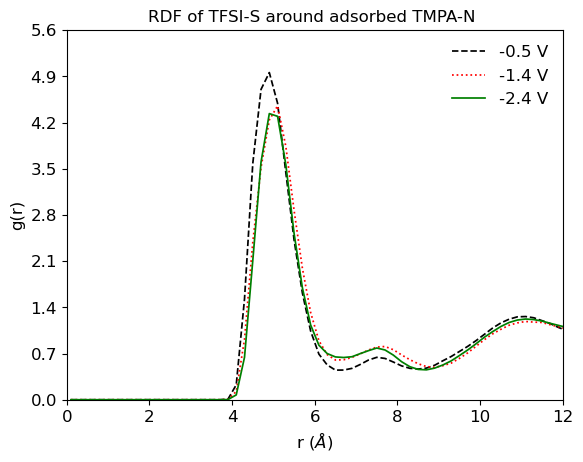

In [14]:
filenames_N = ['TMPA_N-TFSI_S', 'TFSI_S-TMPA_N']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']
anion_name_S = 'TFSI-S' 
cation_name_N = 'TMPA-N'

dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 #######
RDFs_dats_CaA = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/AnaRes/{filenames[0]} RDFs.dat'
      ]



RDFs_dats_AaC = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_list_CaA = []

RDFs_list_AaC = []


for i in range(len(RDFs_dats_CaA)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA.append(RDFs_dat_lists)

RDFs= RPS(anion_name_S ,cation_name_N)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_CaA, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaC)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC.append(RDFs_dat_lists)

RDFs= RPS(cation_name_N, anion_name_S)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_AaC, V_drops_anod, colors, linestyles)

#### RDFs of adsorbed ion1_i and adsorbed ions

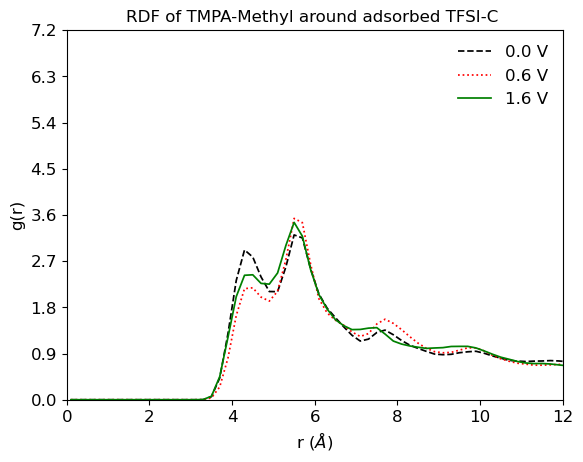

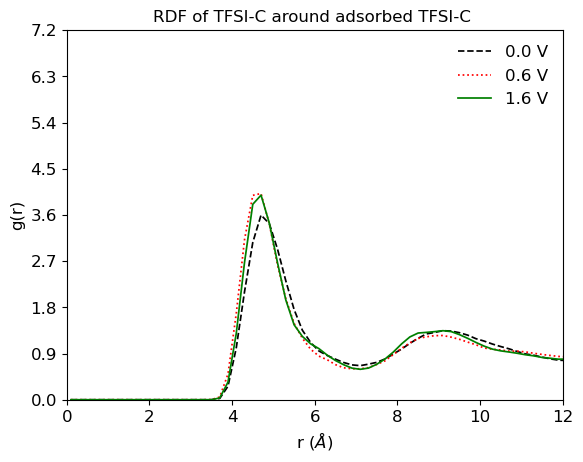

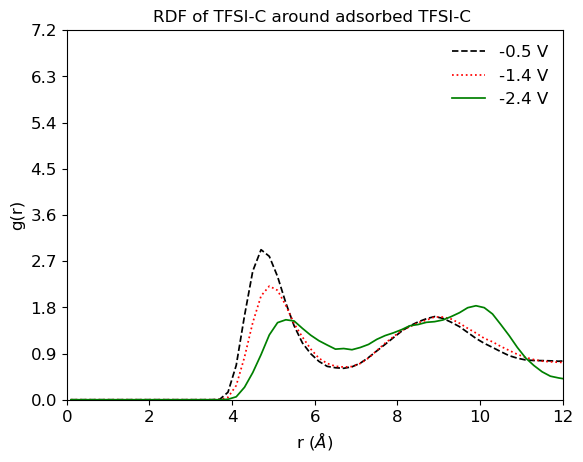

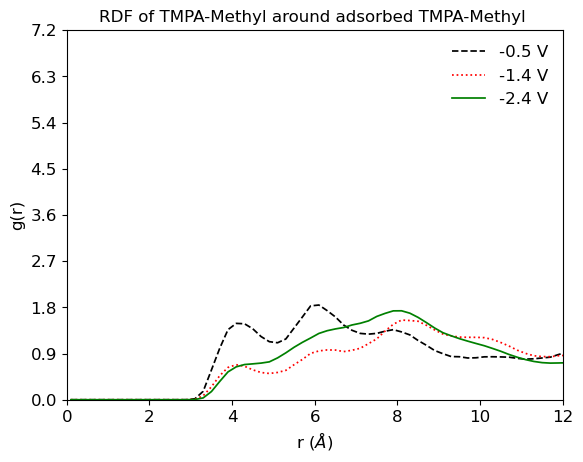

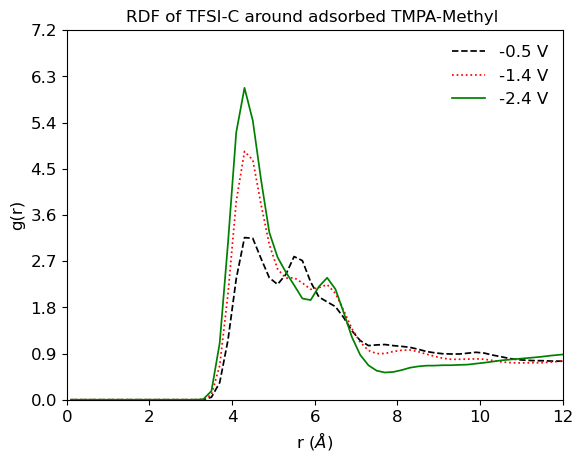

In [8]:
filenames= ['inEDL_TMPA_methyls-TFSI_C', 'inEDL_TFSI_C-TFSI_C', 'inEDL_TFSI_C-TFSI_C_anod', 'inEDL_TMPA_methyls-TMPA_methyls', 'inEDL_TFSI_C-TMPA_methyls']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']


anion_name_C = 'TFSI-C' 
anion_name_S = 'TFSI-S'
cation_name_N= 'TMPA-N'
cation_name_methyl = 'TMPA-Methyl'
cation_name_Propyl = 'TMPA-Pro'


dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 ######
RDFs_dats_CaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[0]} RDFs.dat',
      ]

RDFs_dats_AaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[1]} RDFs.dat',
      ]

RDFs_dats_AaA_anod = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[2]} RDFs.dat',
      ]

RDFs_dats_CaC = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[3]} RDFs.dat',

      ]

RDFs_dats_AaC_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[4]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[4]} RDFs.dat',

      ]


RDFs_list_CaA_C = []
RDFs_list_AaA_C = []
RDFs_list_AaA_anod = []
RDFs_list_CaC = []
RDFs_list_AaC_C = []


for i in range(len(RDFs_dats_CaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,cation_name_methyl)
RDFs.plot_rdfs_12(12, 7.2, newedge, RDFs_list_CaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,anion_name_C)
RDFs.plot_rdfs_11(12, 7.2, newedge, RDFs_list_AaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaA_anod)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaA_anod[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaA_anod.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,anion_name_C)
RDFs.plot_rdfs_11(12, 7.2, newedge, RDFs_list_AaA_anod, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_CaC)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC.append(RDFs_dat_lists)

RDFs= RPS(cation_name_methyl, cation_name_methyl)
RDFs.plot_rdfs_11(12, 7.2, newedge, RDFs_list_CaC, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_AaC_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC_C.append(RDFs_dat_lists)

RDFs= RPS(cation_name_methyl, anion_name_C)
RDFs.plot_rdfs_12(12, 7.2, newedge, RDFs_list_AaC_C, V_drops_anod, colors, linestyles)

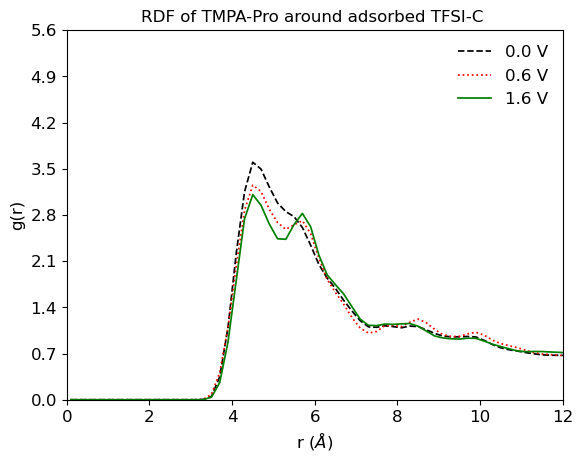

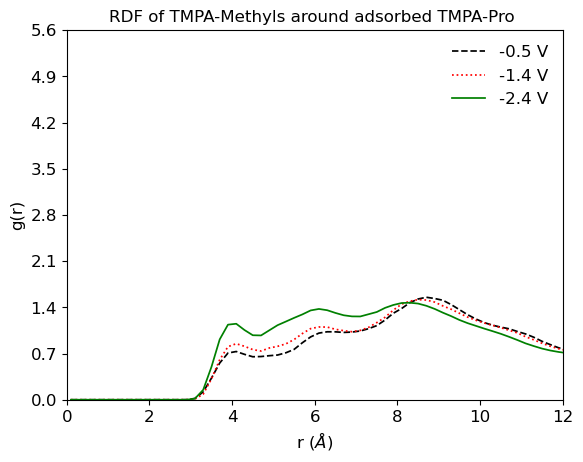

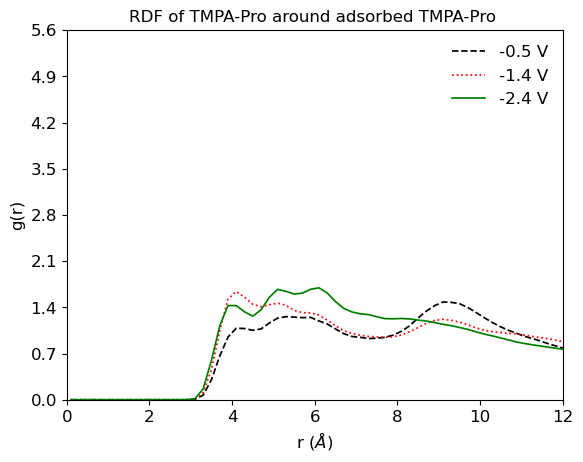

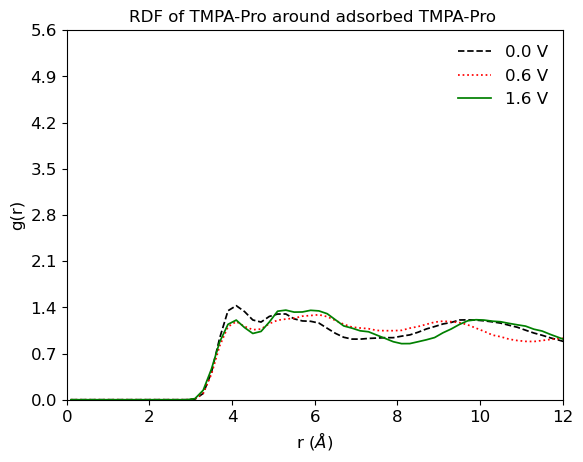

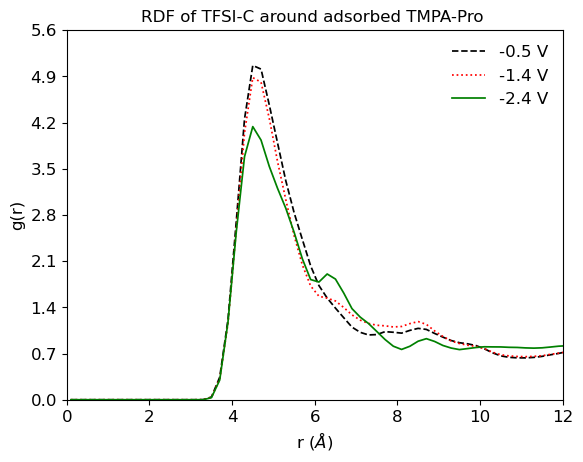

In [13]:
filenames_pro= ['inEDL_TMPA_propyl-TFSI_C', 'inEDL_TMPA_methyls-TMPA_propyl', 'inEDL_TMPA_propyl-TMPA_methyls', 'inEDL_TMPA_propyl-TMPA_propyl', 'inEDL_TMPA_propyl-TMPA_propyl_cat', 'inEDL_TFSI_C-TMPA_propyl']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']
anion_name_C = 'TFSI-C' 
cation_name_Propyl = 'TMPA-Pro'
cation_name_Methyls = 'TMPA-Methyls'

dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 #######
RDFs_dats_CaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/AnaRes/{filenames[0]} RDFs.dat'
      ]

RDFs_dats_CaC_Alkyls_M_P = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]


RDFs_dats_CaC_Pro = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_dats_CaC_Pro_cat = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_dats_AaC_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[5]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[5]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[5]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[5]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_list_CaA_C = []
RDFs_list_CaC_Pro = []
RDFs_list_CaC_Pro_cat = []
RDFs_list_CaC_Alkyls_M_P=[]
RDFs_list_CaC_Alkyls_P_M=[]
RDFs_list_AaC_C = []


for i in range(len(RDFs_dats_CaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,cation_name_Propyl)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_CaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_CaC_Alkyls_M_P)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Alkyls_M_P[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Alkyls_M_P.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Methyls)
RDFs.plot_rdfs_11(12, 5.6, newedge, RDFs_list_CaC_Alkyls_M_P, V_drops_anod, colors, linestyles)


for i in range(len(RDFs_dats_CaC_Pro)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Pro[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Pro.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Propyl)
RDFs.plot_rdfs_11(12, 5.6, newedge, RDFs_list_CaC_Pro, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_CaC_Pro_cat)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Pro_cat[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Pro_cat.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Propyl)
RDFs.plot_rdfs_11(12, 5.6, newedge, RDFs_list_CaC_Pro_cat, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaC_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC_C.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, anion_name_C)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_AaC_C, V_drops_anod, colors, linestyles)


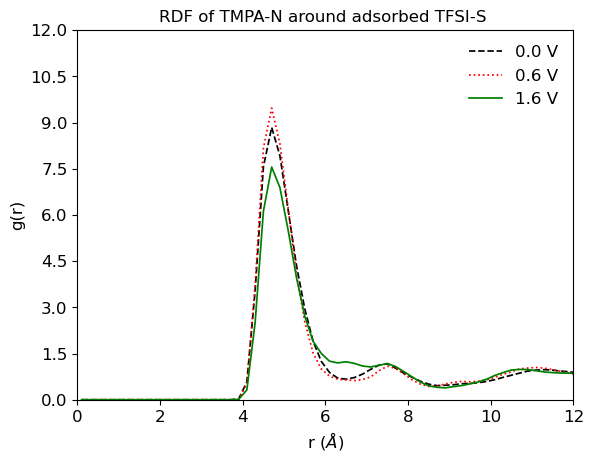

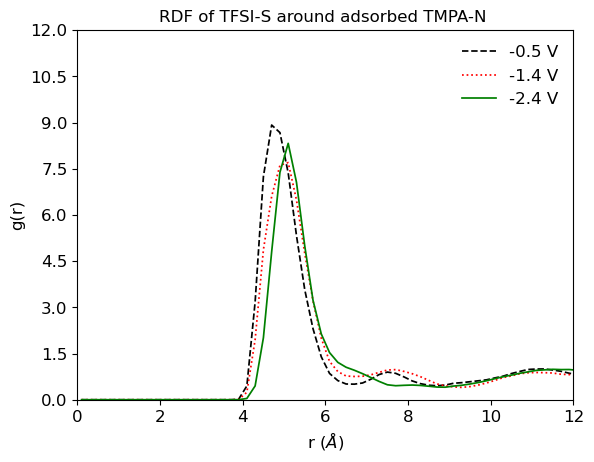

In [9]:
filenames_N = ['inEDL_TMPA_N-TFSI_S', 'inEDL_TFSI_S-TMPA_N']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']
anion_name_S = 'TFSI-S'
cation_name_N = 'TMPA-N'

dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 #######
RDFs_dats_CaA = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/AnaRes/{filenames[0]} RDFs.dat'
      ]



RDFs_dats_AaC = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_list_CaA = []

RDFs_list_AaC = []


for i in range(len(RDFs_dats_CaA)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA.append(RDFs_dat_lists)

RDFs= RPS(anion_name_S ,cation_name_N)
RDFs.plot_rdfs_12(12, 12.0, newedge, RDFs_list_CaA, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaC)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC.append(RDFs_dat_lists)

RDFs= RPS(cation_name_N, anion_name_S)
RDFs.plot_rdfs_12(12, 12.0, newedge, RDFs_list_AaC, V_drops_anod, colors, linestyles)

#### RDFs of adsorbed ion1_i and unadsorbed ions

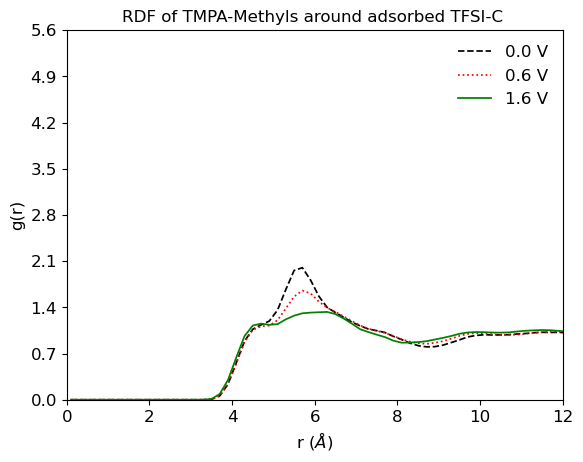

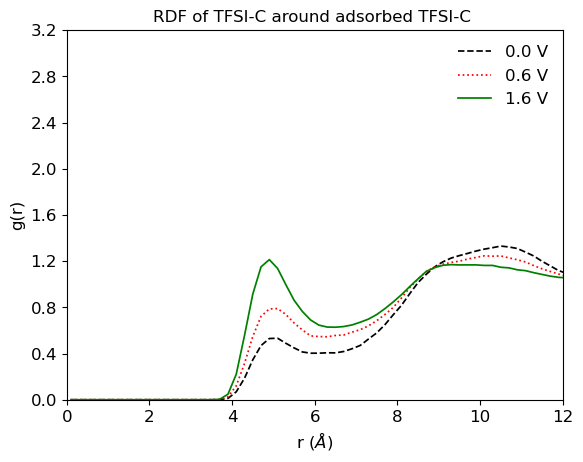

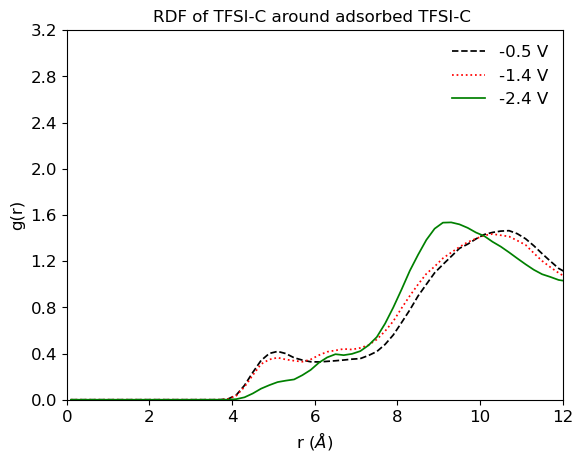

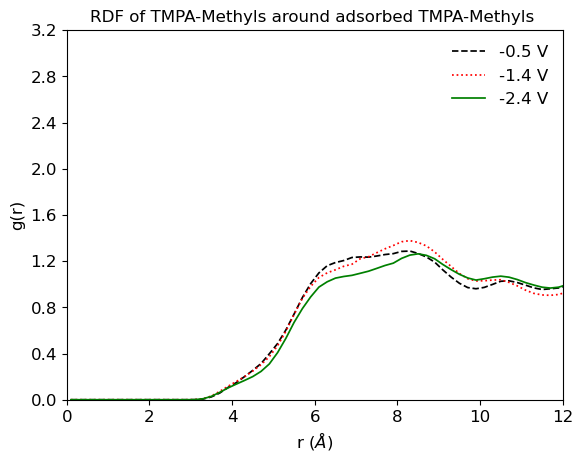

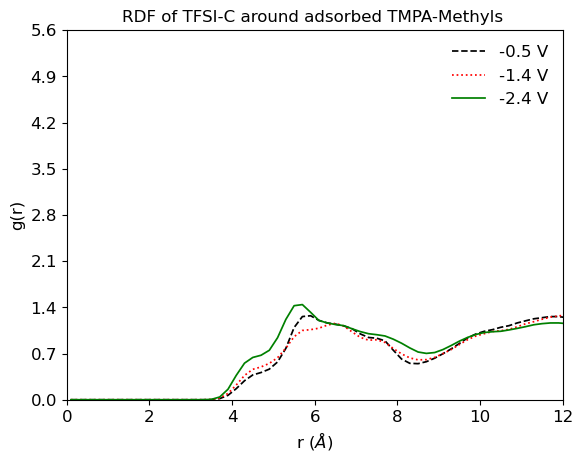

In [10]:
filenames= ['outEDL_TMPA_methyls-TFSI_C', 'outEDL_TFSI_C-TFSI_C', 'outEDL_TFSI_C-TFSI_C_anod', 'outEDL_TMPA_methyls-TMPA_methyls', 'outEDL_TFSI_C-TMPA_methyls']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']


anion_name_C = 'TFSI-C' 
anion_name_S = 'TFSI-S'
cation_name_N= 'TMPA-N'
cation_name_methyl = 'TMPA-Methyls'
cation_name_Propyl = 'TMPA-Propyl'


dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 ######
RDFs_dats_CaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[0]} RDFs.dat',
      ]

RDFs_dats_AaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[1]} RDFs.dat',
      ]

RDFs_dats_AaA_anod = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[2]} RDFs.dat',
      ]

RDFs_dats_CaC = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[3]} RDFs.dat',

      ]

RDFs_dats_AaC_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames[4]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames[4]} RDFs.dat',

      ]


RDFs_list_CaA_C = []
RDFs_list_AaA_C = []
RDFs_list_AaA_anod = []
RDFs_list_CaC = []
RDFs_list_AaC_C = []


for i in range(len(RDFs_dats_CaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,cation_name_methyl)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_CaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,anion_name_C)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_AaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaA_anod)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaA_anod[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaA_anod.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,anion_name_C)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_AaA_anod, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_CaC)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC.append(RDFs_dat_lists)

RDFs= RPS(cation_name_methyl, cation_name_methyl)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_CaC, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_AaC_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC_C.append(RDFs_dat_lists)

RDFs= RPS(cation_name_methyl, anion_name_C)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_AaC_C, V_drops_anod, colors, linestyles)

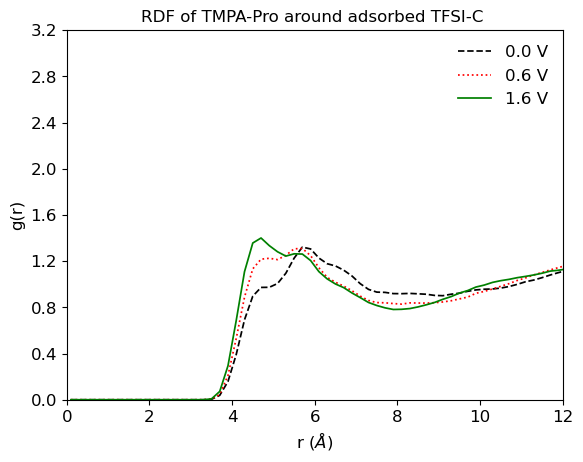

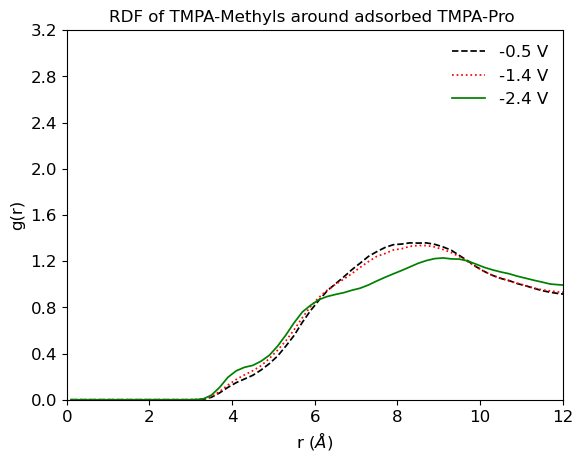

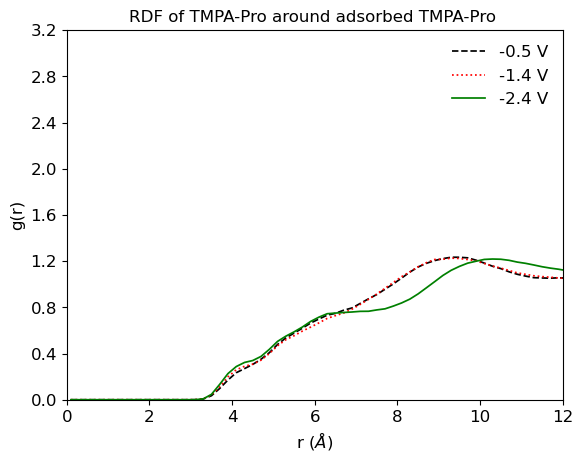

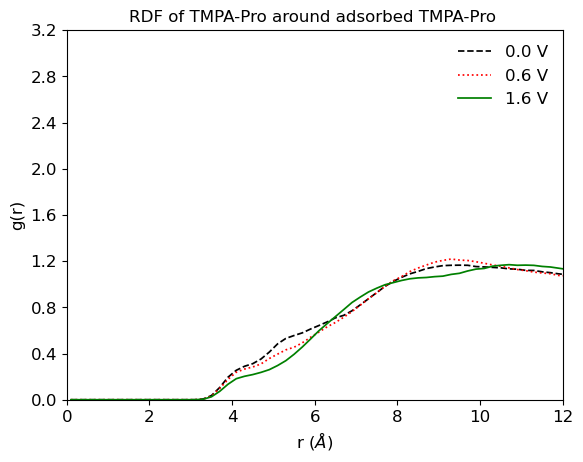

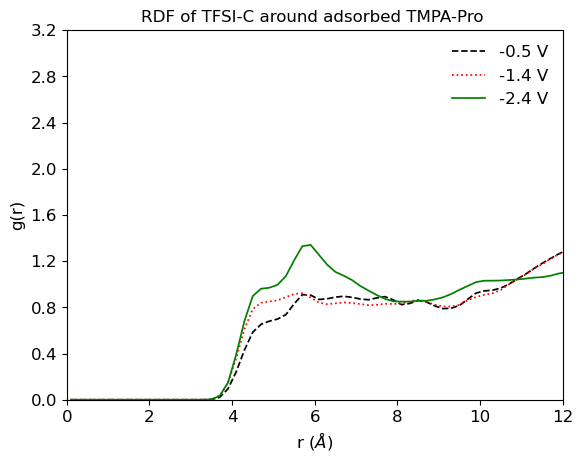

In [11]:
filenames_pro= ['outEDL_TMPA_propyl-TFSI_C', 'outEDL_TMPA_methyls-TMPA_propyl',  'outEDL_TMPA_propyl-TMPA_propyl', 'outEDL_TMPA_propyl-TMPA_propyl_cat', 'outEDL_TFSI_C-TMPA_propyl']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']
anion_name_C = 'TFSI-C' 
cation_name_Propyl ='TMPA-Pro'
cation_name_Methyls = 'TMPA-Methyls'

dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 #######
RDFs_dats_CaA_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/AnaRes/{filenames[0]} RDFs.dat'
      ]

RDFs_dats_CaC_Alkyls_M_P = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_dats_CaC_Pro = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_dats_CaC_Pro_cat = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_dats_AaC_C = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_pro[4]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_list_CaA_C = []
RDFs_list_CaC_Pro = []
RDFs_list_CaC_Pro_cat = []
RDFs_list_CaC_Alkyls_M_P=[]
RDFs_list_CaC_Alkyls_P_M=[]
RDFs_list_AaC_C = []


for i in range(len(RDFs_dats_CaA_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA_C.append(RDFs_dat_lists)

RDFs= RPS(anion_name_C ,cation_name_Propyl)
RDFs.plot_rdfs_12(12, 3.2, newedge, RDFs_list_CaA_C, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_CaC_Alkyls_M_P)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Alkyls_M_P[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Alkyls_M_P.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Methyls)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_CaC_Alkyls_M_P, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_CaC_Pro)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Pro[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Pro.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Propyl)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_CaC_Pro, V_drops_anod, colors, linestyles)

for i in range(len(RDFs_dats_CaC_Pro_cat)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaC_Pro_cat[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaC_Pro_cat.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, cation_name_Propyl)
RDFs.plot_rdfs_11(12, 3.2, newedge, RDFs_list_CaC_Pro_cat, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaC_C)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC_C[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC_C.append(RDFs_dat_lists)

RDFs= RPS(cation_name_Propyl, anion_name_C)
RDFs.plot_rdfs_12(12, 3.2, newedge, RDFs_list_AaC_C, V_drops_anod, colors, linestyles)


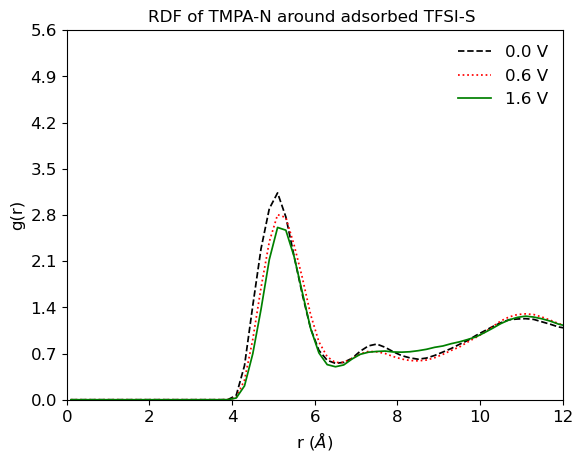

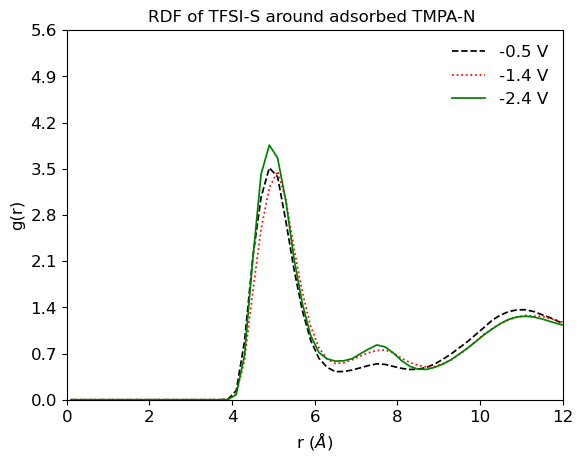

In [12]:
filenames_N = ['outEDL_TMPA_N-TFSI_S', 'outEDL_TFSI_S-TMPA_N']
# voltages= [0.0, 0.5, 1.5, 2.0, 3.5, 4.0]
# voltages= [0.0, 2.0, 4.0]
V_drops_cat= [0.0, 0.6, 1.6]
V_drops_anod= [-0.5, -1.4, -2.4]
# colors = ['g', 'k', 'b', 'r','c', 'm']

# voltage_name=[0, 0.5, 1.5, 2, 3.5, 4]
voltage_name=[0.5, 2, 4]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']
anion_name_S = 'TFSI-S' 
cation_name_N = 'TMPA-N'

dmin, dmax = 0.0, 13.0
bin_width = 0.2
n_bins = int(dmax/bin_width)
rdf_ion1_ion2, edges = numpy.histogram([0], bins=n_bins, range=(dmin, dmax))
edges = 0.5 * (edges[1:] + edges[:-1])
newedge = numpy.array(edges)

##### ns 100 #######
RDFs_dats_CaA = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[0]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_N[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/AnaRes/{filenames[0]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/AnaRes/{filenames[0]} RDFs.dat'
      ]



RDFs_dats_AaC = [
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/{filenames_pro[2]} RDFs.dat',
    f'../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/{filenames_N[1]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/{filenames[3]} RDFs.dat',
    # f'../sim_output_dir/400[N1113][TFSI]/sim_output_v12_ns100/{filenames[3]} RDFs.dat'
      ]

RDFs_list_CaA = []

RDFs_list_AaC = []


for i in range(len(RDFs_dats_CaA)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_CaA[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_CaA.append(RDFs_dat_lists)

RDFs= RPS(anion_name_S ,cation_name_N)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_CaA, V_drops_cat, colors, linestyles)

for i in range(len(RDFs_dats_AaC)):
    RDFs_dat_list = RDFs_dat(RDFs_dats_AaC[i])
    RDFs_dat_lists = RDFs_dat_list.dat_list()
    RDFs_list_AaC.append(RDFs_dat_lists)

RDFs= RPS(cation_name_N, anion_name_S)
RDFs.plot_rdfs_12(12, 5.6, newedge, RDFs_list_AaC, V_drops_anod, colors, linestyles)


### InterRDFS

In [20]:
%%time

pdb_files = [
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v6_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/start_drudes.pdb',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/start_drudes.pdb'
    
] 

dcd_files = [
    
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/FV_NVT.dcd',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/FV_NVT.dcd',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v6_ns100/FV_NVT.dcd',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v8_ns100/FV_NVT.dcd',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v10_ns100/FV_NVT.dcd',

]

u_list = [mda.Universe(pdb, dcd) for pdb, dcd in zip(pdb_files, dcd_files)]

grp_AB_list = [u.select_atoms('resname grp and segid A') | u.select_atoms('resname grp and segid B') for u in u_list]
electrode_z_positions_list = [np.array(grp.positions[:, 2]) for grp in grp_AB_list]

TMPA_lists = [u.select_atoms('resname TMP and (name N)') for u in u_list]
TFSI_CF3_lists = [u.select_atoms('resname Tf2 and (name Ctf or name Ctf1)') for u in u_list]
TFSI_S_lists = [u.select_atoms('resname Tf2 and (name Stf or name Stf1)') for u in u_list]
Startframe = 9998
Endframe= 9999
first_peak_dist=[6, 4, 8, 4.5]
irdf_range= (0, 15)
rdf_results_CaA_Ctf = []
rdf_results_AaA_Ctf = []

rdf_results_AaC_Ctf = []
rdf_results_CaC = []

# Reference is the positive electrode (cathode)
for i in range(len(u_list)):
    RDFs_CaA= RDFs(u_list[i], Startframe, Endframe, TFSI_CF3_lists[i], TMPA_lists[i] , electrode_z_positions_list[i], first_peak_dist[0]) 
    rdf_results_CaA_Ctf.extend(RDFs_CaA.cal_rdfs_CaA(irdf_range))
for i in range(len(u_list)):
    RDFs_AaA= RDFs(u_list[i], Startframe, Endframe, TFSI_CF3_lists[i], TFSI_CF3_lists[i] , electrode_z_positions_list[i], first_peak_dist[0]) 
    rdf_results_AaA_Ctf.extend(RDFs_AaA.cal_rdfs_AaA(irdf_range))
    
# Reference is the negative electrode (anode)
for i in range(len(u_list)):
    RDFs_AaC= RDFs(u_list[i], Startframe, Endframe, TMPA_lists[i], TFSI_CF3_lists[i] , electrode_z_positions_list[i], first_peak_dist[3]) 
    rdf_results_AaC_Ctf.extend(RDFs_AaC.cal_rdfs_AaC(irdf_range))
for i in range(len(u_list)):
    RDFs_CaC= RDFs(u_list[i], Startframe, Endframe, TMPA_lists[i], TMPA_lists[i] , electrode_z_positions_list[i], first_peak_dist[3])
    rdf_results_CaC.extend(RDFs_CaC.cal_rdfs_CaC(irdf_range))
    
############################## TFSI_S ############################

rdf_results_CaA_Stf = []
rdf_results_AaA_Stf = []

rdf_results_AaC_Stf = []
# rdf_results_CaC = []

# Reference is the positive electrode (cathode)
for i in range(len(u_list)):
    RDFs_CaA= RDFs(u_list[i], Startframe, Endframe, TFSI_S_lists[i], TMPA_lists[i] , electrode_z_positions_list[i], first_peak_dist[3]) 
    rdf_results_CaA_Stf.extend(RDFs_CaA.cal_rdfs_CaA(irdf_range))
for i in range(len(u_list)):
    RDFs_AaA= RDFs(u_list[i], Startframe, Endframe, TFSI_S_lists[i], TFSI_S_lists[i] , electrode_z_positions_list[i], first_peak_dist[3]) 
    rdf_results_AaA_Stf.extend(RDFs_AaA.cal_rdfs_AaA(irdf_range))
    
# Reference is the negative electrode (anode)
for i in range(len(u_list)):
    RDFs_AaC= RDFs(u_list[i], Startframe, Endframe, TMPA_lists[i], TFSI_S_lists[i] , electrode_z_positions_list[i], first_peak_dist[3])
    rdf_results_AaC_Stf.extend(RDFs_AaC.cal_rdfs_AaC(irdf_range))
# for i in range(len(u_list)):
#     RDFs_CaC= RDFs(u_list[i], Startframe, Endframe, TMPA_lists[i], TMPA_lists[i] , electrode_z_positions_list[i], first_peak_dist[3])
#     rdf_results_CaC.extend(RDFs_AaC.cal_rdfs_CaC(irdf_range))


CPU times: user 10min 1s, sys: 32.7 s, total: 10min 34s
Wall time: 12min 48s


In [21]:
import pickle  # Import pickle for serialization

# Your existing code to calculate RDFs and create RDFs objects

# Save RDF objects to files
with open('rdf_results_CaA_Ctf.pkl', 'wb') as f:
    pickle.dump(rdf_results_CaA_Ctf, f)

with open('rdf_results_AaA_Ctf.pkl', 'wb') as f:
    pickle.dump(rdf_results_AaA_Ctf, f)

with open('rdf_results_AaC_Ctf.pkl', 'wb') as f:
    pickle.dump(rdf_results_AaC_Ctf, f)

with open('rdf_results_CaC.pkl', 'wb') as f:
    pickle.dump(rdf_results_CaC, f)

############################## TFSI_S ############################

with open('rdf_results_CaA_Stf.pkl', 'wb') as f:
    pickle.dump(rdf_results_CaA_Stf, f)

with open('rdf_results_AaA_Stf.pkl', 'wb') as f:
    pickle.dump(rdf_results_AaA_Stf, f)

with open('rdf_results_AaC_Stf.pkl', 'wb') as f:
    pickle.dump(rdf_results_AaC_Stf, f)

# with open('rdf_results_CaC.pkl', 'wb') as f:
#     pickle.dump(rdf_results_CaC, f)

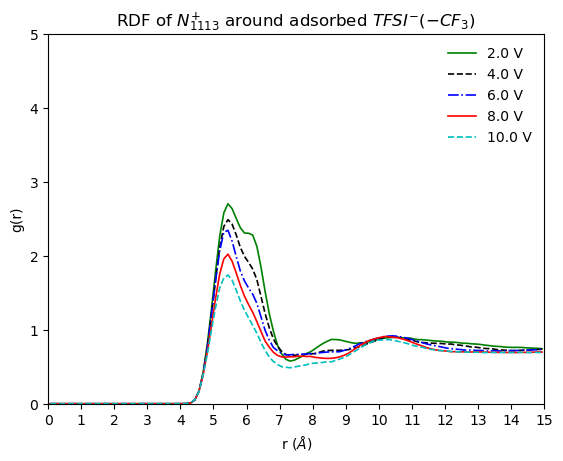

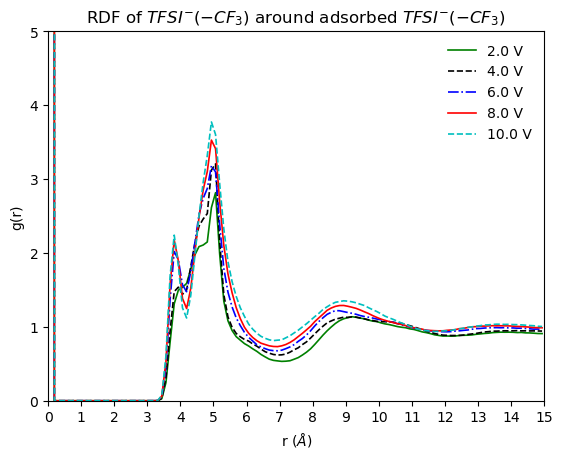

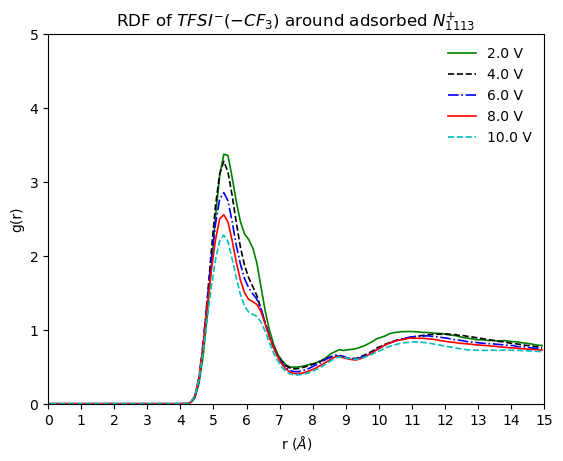

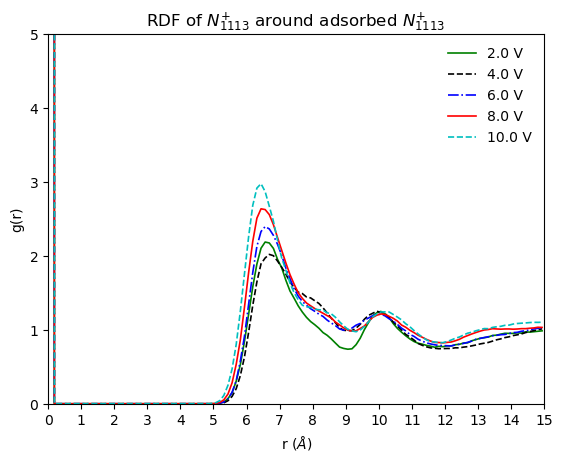

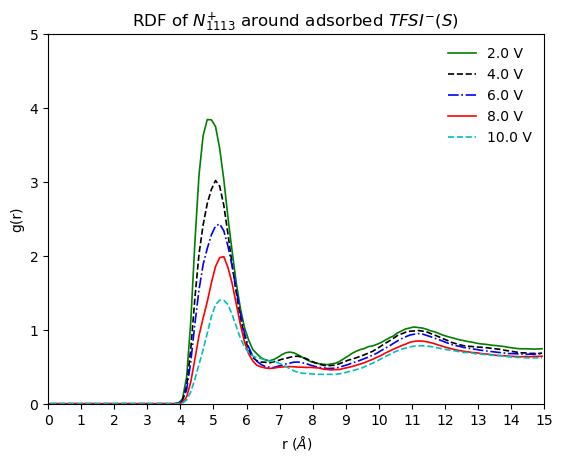

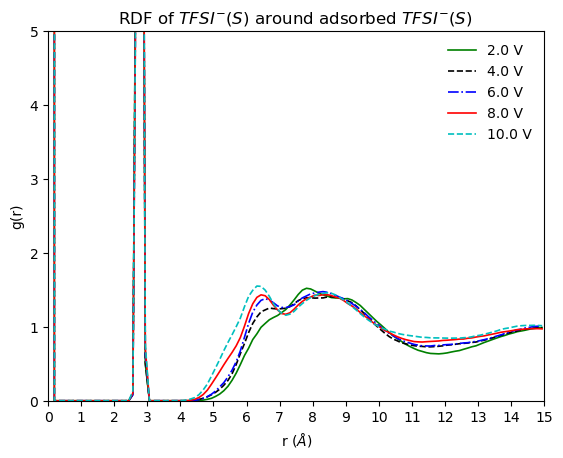

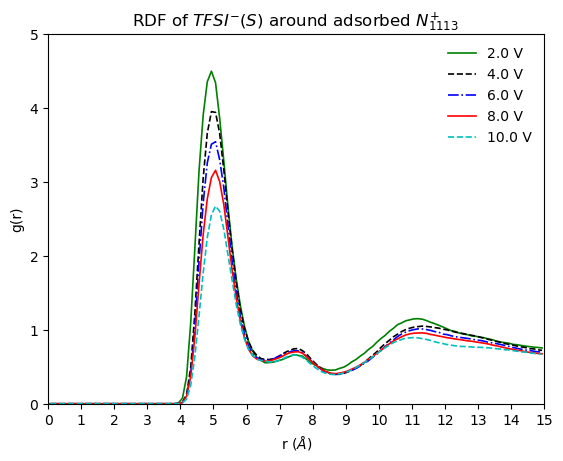

In [14]:
import pickle

# # Load RDF objects from files
with open('rdf_results_CaA_Ctf.pkl', 'rb') as f:
    rdf_results_CaA_Ctf = pickle.load(f)

with open('rdf_results_AaA_Ctf.pkl', 'rb') as f:
    rdf_results_AaA_Ctf = pickle.load(f)

with open('rdf_results_AaC_Ctf.pkl', 'rb') as f:
    rdf_results_AaC_Ctf = pickle.load(f)

with open('rdf_results_CaC.pkl', 'rb') as f:
    rdf_results_CaC = pickle.load(f)

with open('rdf_results_CaA_Stf.pkl', 'rb') as f:
    rdf_results_CaA_Stf = pickle.load(f)

with open('rdf_results_AaA_Stf.pkl', 'rb') as f:
    rdf_results_AaA_Stf = pickle.load(f)

with open('rdf_results_AaC_Stf.pkl', 'rb') as f:
    rdf_results_AaC_Stf = pickle.load(f)

# with open('rdf_results_CaC.pkl', 'rb') as f:
#     rdf_results_CaC = pickle.load(f)

xlim = 15
ylim = 5
voltages = [2.0, 4.0, 6.0, 8.0, 10.0]
colors = ['g', 'k', 'b', 'r','c']
          # 'm','y'
linestyles= ['-', '--', '-.', '-', '--']
cation_name= '$N_{1113}^{+}$'
anion_name1= '$TFSI^{-} (S)$'
anion_name= '$TFSI^{-} (-CF_{3})$'

RPS_CaA= RPS(cation_name, anion_name)
RPS_CaA.plot_rdfs_CaA(rdf_results_CaA_Ctf,xlim, ylim, voltages, colors, linestyles)

RPS_AaA= RPS(cation_name, anion_name)
RPS_AaA.plot_rdfs_AaA(rdf_results_AaA_Ctf, xlim, ylim, voltages, colors, linestyles)

RPS_AaC= RPS(cation_name, anion_name)
RPS_AaC.plot_rdfs_AaC(rdf_results_AaC_Ctf, xlim, ylim, voltages, colors, linestyles)

RPS_CaC= RPS(cation_name, anion_name)
RPS_CaC.plot_rdfs_CaC(rdf_results_CaC, xlim, ylim, voltages, colors, linestyles)

RPS_CaA= RPS(cation_name, anion_name1)
RPS_CaA.plot_rdfs_CaA(rdf_results_CaA_Stf,xlim, ylim, voltages, colors, linestyles)

RPS_AaA= RPS(cation_name, anion_name1)
RPS_AaA.plot_rdfs_AaA(rdf_results_AaA_Stf, xlim, ylim, voltages, colors, linestyles)

RPS_AaC= RPS(cation_name, anion_name1)
RPS_AaC.plot_rdfs_AaC(rdf_results_AaC_Stf, xlim, ylim, voltages, colors, linestyles)
# RPS_CaC= RPS(cation_name, anion_name)
# RPS_CaC.plot_rdfs_CaC(rdf_results_CaC, xlim, ylim, voltages, colors, linestyles)

# Differential Capacitance Analysis

## Charge density distribution (L_cell)

### At cathode

/home/kevin/anaconda3/envs/py310/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


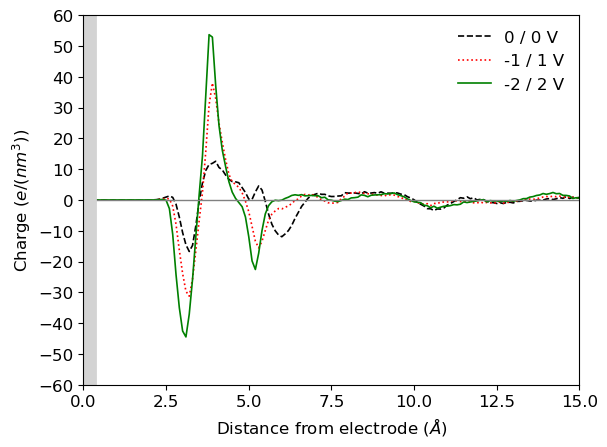

In [7]:
NTCV = [
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v1_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/normalized_total_charge.dat',
      ]

NTC_list=[]

for i in range(len(NTCV)):
    NTCV_list = NTC(NTCV[i])
    NTCV_lists = NTCV_list.NTCV_list()
    NTC_list.append(NTCV_lists)

pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/start_drudes.pdb'
dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/FV_NVT.dcd'
u= mda.Universe(pdb_v0,dcd_v0)
grp_A_list = [u.select_atoms('resname grp and segid A and name C1') for u in u_list]
grp_B_list = [u.select_atoms('resname grp and segid B and name C1') for u in u_list]
grp_A_pos = grp_A_list[0].positions[:, 2]
grp_B_pos = grp_B_list[0].positions[:, 2]
bin_width = 0.1
# num_bins=120
Lcell = max(grp_B_pos) - max(grp_A_pos)
# bin_width = Lcell/bin_width
dmax=15
ylim=60
vec_x = u.trajectory[0].triclinic_dimensions[0]
vec_y = u.trajectory[0].triclinic_dimensions[1]
area = LA.norm( np.cross(vec_x, vec_y) )

charge_density_list=[]
for i in range(len(NTC_list)):
    charge_density_list.append(np.array(NTC_list[i])*1000/(area*bin_width))


# title= '400 $[N_{1113}^{+}][TFSI^{-}]$'
voltages = [0.0, 2.0, 4.0]
# voltages = [6, 8, 10, 12]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']

cdp = CDP_oneside(bin_width, dmax, ylim)
cdp.w_m_plots(charge_density_list, voltages, colors, linestyles, 6)

### At anode

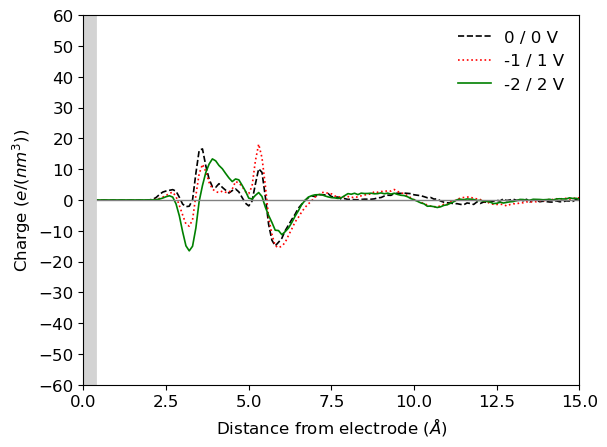

In [8]:
NTCV = [
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v1_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/normalized_total_charge.dat',
      ]

NTC_list=[]

for i in range(len(NTCV)):
    NTCV_list = NTC(NTCV[i])
    NTCV_lists = NTCV_list.NTCV_list()
    NTC_list.append(NTCV_lists)

pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/start_drudes.pdb'
dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/FV_NVT.dcd'
u= mda.Universe(pdb_v0,dcd_v0)
bin_width = 0.1
# num_bins=120
Lcell = max(grp_B_pos) - max(grp_A_pos)
# bin_width= Lcell/num_bins
dmax=15
ylim=60
vec_x = u.trajectory[0].triclinic_dimensions[0]
vec_y = u.trajectory[0].triclinic_dimensions[1]
area = LA.norm( np.cross(vec_x, vec_y) )

charge_density_list=[]
for i in range(len(NTC_list)):
    charge_density_list.append(np.array(NTC_list[i])*1000/(area*bin_width))
    rev_charge_density_list= np.flip(charge_density_list)


# title= '400 $[N_{1113}^{+}][TFSI^{-}]$'
voltages = [0, 2, 4]
# voltages = [6, 8, 10, 12]

colors = ['k', 'r', 'g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['--', ':', '-']

cdp = CDP_oneside(bin_width, dmax, ylim)
cdp.w_m_plots(rev_charge_density_list, voltages, colors, linestyles, 6)

## ETC

In [3]:
electrode_total_charge_files = [
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/energy_v0.log',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/energy_v0.5.log',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v1_ns100/energy_v1.log',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/energy_v1.5.log',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/energy_v2.log',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/energy_v2.5.log',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/energy_v3.log',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/energy_v4.log',
]

# Corresponding voltage levels for each file
voltage_levels = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4]

Startframe = 5000
Endframe = 9999 # count all charges (lines) before endframe iteration, ex Endframe = 9999 -> counting lines is 999800 not 1000000  

# Initialize dictionaries to store results for cathode and anode charges
cathode_charges = {}
anode_charges = {}

for file_path, voltage_level in zip(electrode_total_charge_files, voltage_levels):
    etc_ns = ETC([file_path], [voltage_level], Startframe, Endframe)
    
    # Calculate and store cathode charge
    average_total_cathode_charge = etc_ns.cal_ETC_2done()
    cathode_charges[voltage_level] = average_total_cathode_charge[0]
    
    # Calculate and store anode charge
    average_total_anode_charge = etc_ns.cal_ETC_2done()
    anode_charges[voltage_level] = average_total_anode_charge[1]

# Combine the cathode and anode results into a single dictionary
SC_dict = {'v{}_cat'.format(v): cathode_charges[v] for v in voltage_levels}
SC_dict.update({'v{}_an'.format(v): anode_charges[v] for v in voltage_levels})

print(SC_dict)

{'v0_cat': 0.11916172077222939, 'v0.5_cat': 1.6722645266960166, 'v1_cat': 2.7742139260784837, 'v1.5_cat': 4.5092677378558905, 'v2_cat': 5.882342968202333, 'v2.5_cat': 7.4166400932046175, 'v3_cat': 9.202620937053135, 'v4_cat': 12.555824466594755, 'v0_an': -0.13116172077249116, 'v0.5_an': -1.6842645266963585, 'v1_an': -2.7862139260787377, 'v1.5_an': -4.521267737856334, 'v2_an': -5.89434296820248, 'v2.5_an': -7.4286400932047405, 'v3_an': -9.214620937053398, 'v4_an': -12.567824466594823}


## Possion Profile

/home/kevin/anaconda3/envs/py310/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


[0.11916172077222939, 1.6722645266960166, 2.7742139260784837, 4.5092677378558905, 5.882342968202333, 7.4166400932046175, 9.202620937053135, 12.555824466594755]


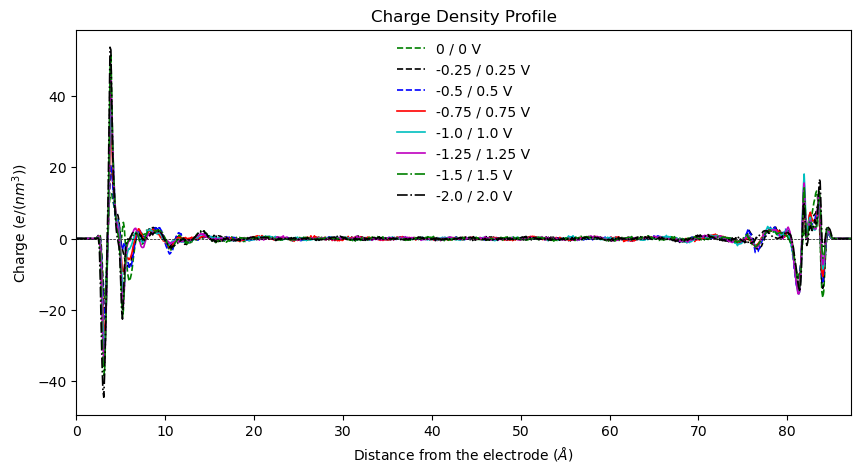

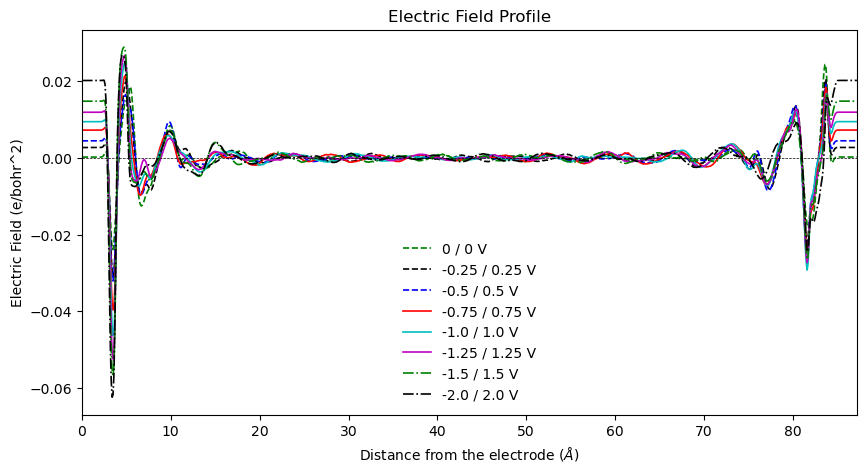

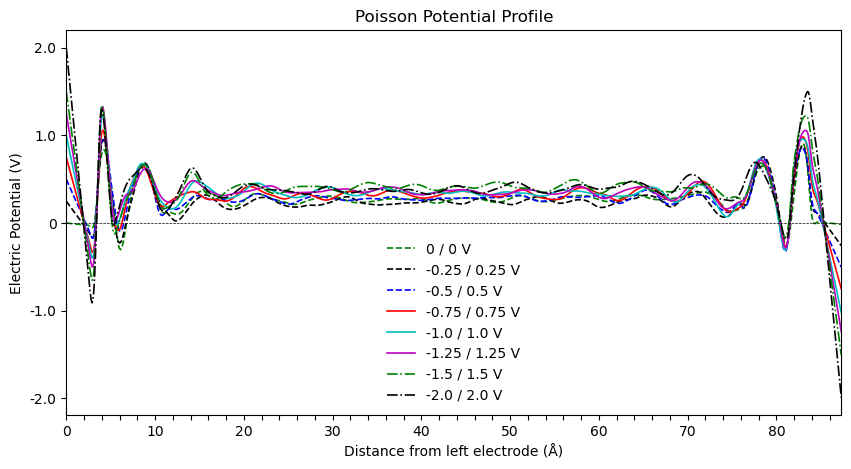

{'v0_cat': ([0.0], [-0.26370730638518447]), 'v0_an': ([-0.015101148345231248], [-0.2788084547304157]), 'v0.5_cat': ([0.25], [0.009526790081031494]), 'v0.5_an': ([-0.25788699525988257], [-0.49836020517885105]), 'v1_cat': ([0.5], [0.21639238939306432]), 'v1_an': ([-0.5041007333928668], [-0.7877083439998025]), 'v1.5_cat': ([0.75], [0.40147430988198113]), 'v1.5_an': ([-0.7523344539601392], [-1.100860144078158]), 'v2_cat': ([1.0], [0.6493299055326106]), 'v2_an': ([-1.0240931727348475], [-1.374763267202237]), 'v2.5_cat': ([1.25], [0.8785557399683527]), 'v2.5_an': ([-1.2393797966108568], [-1.610824056642504]), 'v3_cat': ([1.5], [1.0957650991403416]), 'v3_an': ([-1.505386371612677], [-1.9096212724723354]), 'v4_cat': ([2.0], [1.6076949583640006]), 'v4_an': ([-1.9936882598974262], [-2.385993301533426])}


In [4]:
pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/start_drudes.pdb'
dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/FV_NVT.dcd'
u= mda.Universe(pdb_v0, dcd_v0)
grp_A_list = [u.select_atoms('resname grp and segid A and name C1') for u in u_list]
grp_B_list = [u.select_atoms('resname grp and segid B and name C1') for u in u_list]
grp_A_pos = grp_A_list[0].positions[:, 2]
grp_B_pos = grp_B_list[0].positions[:, 2]
electrode_z_positions= (grp_A_pos, grp_B_pos)

# num_bins=120
Lcell = max(grp_B_pos) - max(grp_A_pos)

bin_width = 0.1
# bin_width = Lcell/num_bins

n_bins = int(Lcell/bin_width)

# hist_range = (min(grp_B_pos) - dmax , min(grp_B_pos))
dz = bin_width
L_all = 180.422
V_app = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]
# V_app = [6, 8, 10, 12]
V_Level = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4]
# V_Level = [6, 8, 10, 12]

Q_cat = [SC_dict['v0_cat'],
         SC_dict['v0.5_cat'],
         SC_dict['v1_cat'],
         SC_dict['v1.5_cat'],
         SC_dict['v2_cat'],
         SC_dict['v2.5_cat'],
         SC_dict['v3_cat'],
         # SC_dict['v3.5_cat'],
         SC_dict['v4_cat']
         
]
print(Q_cat)


V_init = [(V_init_i)/2 for V_init_i in V_app ]
NTCV = [
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v1_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/normalized_total_charge.dat',
      ]

NTC_list=[]

for i in range(len(NTCV)):
    NTCV_list = NTC(NTCV[i])
    NTCV_lists = NTCV_list.NTCV_list()
    NTC_list.append(NTCV_lists)

colors = ['g', 'k', 'b', 'r','c', 'm', 'g', 'k']
# colors = ['g', 'k', 'b', 'r']
          
linestyles= ['--', '--', '--', '-', '-', '-', '-.', '-.']
# linestyles= ['--', '--', '--', '-']
             
tick_x_positions = [0, 10, 20, 30, 40, 50, 60, 70, 80, 85]
tick_y_positions = [-2.0, -1.75, -1.0, -0.75, -0.25, 0, 0.25, 0.75, 1.0, 1.75, 2.0]
# pos_pot = pospot(u, dz, L_all, V_app, Q_cat, V_init, NTC_list, electrode_z_positions, n_bins, bin_width)
pos_pot = pospot(u, dz, L_all, V_app, Q_cat, V_init, NTC_list, electrode_z_positions, n_bins, bin_width)
pos_pot.plot_pospot(tick_x_positions, tick_y_positions, colors, linestyles)

V_drop_dict = {}
for i, V_level in enumerate(V_Level):
    pos_pot_i = pospot(u, dz, L_all, [V_level], [Q_cat[i]], [V_init[i]], [NTC_list[i]], electrode_z_positions, n_bins, bin_width)
    V_cat, V_anode, V_mid, V_drop_cat, V_drop_anode = pos_pot_i.cal_V_drop()
    V_drop_dict[f'v{V_level}_cat'] = (V_cat, V_drop_cat)
    V_drop_dict[f'v{V_level}_an'] = (V_anode, V_drop_anode)

print(V_drop_dict)

## Differential Capacitances

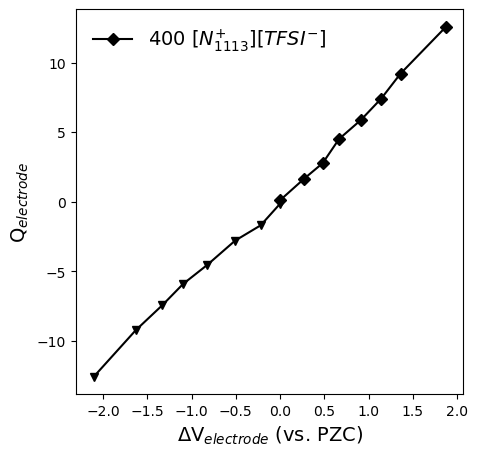

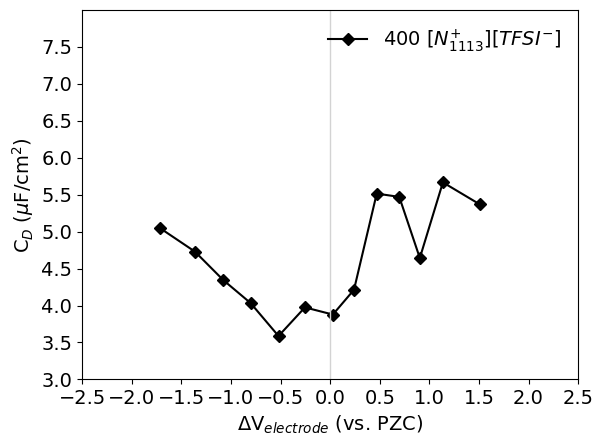

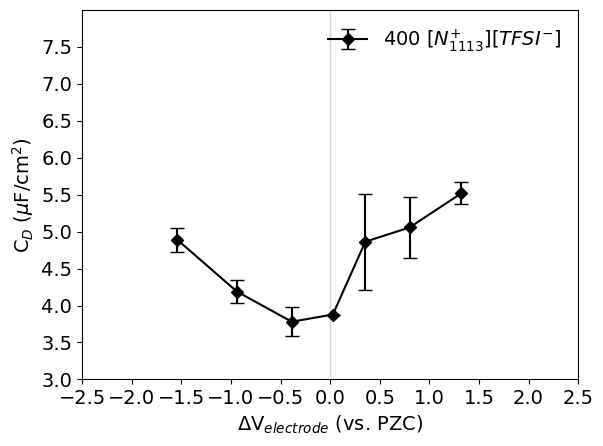

In [6]:
pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/start_drudes.pdb'
dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/FV_NVT.dcd'
u = mda.Universe(pdb_v0, dcd_v0)
vec_x = u.trajectory[0].triclinic_dimensions[0]
vec_y = u.trajectory[0].triclinic_dimensions[1]
area = LA.norm(np.cross(vec_x, vec_y))  # unit is (angstrom)^2

V_app = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4]  # Extract the voltage levels from SC_dict

# Example voltage drop and charge data
V_drops_pos_N1113 = np.array([V_drop_dict[f'v{V}_cat'][1][0] for V in V_app])  # Extract cathode values from V_drop_dict
V_drops_pos = [V_drops_pos_N1113, V_drops_pos_N1113/2]

V_drops_neg_N1113 = np.array([V_drop_dict[f'v{V}_an'][1][0] for V in V_app])
V_drops_neg = [V_drops_neg_N1113, V_drops_neg_N1113/2]

Q_cat_N1113 = np.array([SC_dict[f'v{V}_cat'] for V in V_app])  # Extract cathode charges from SC_dict
Q_cat = [Q_cat_N1113, Q_cat_N1113/2]

Q_an_N1113 = np.array([SC_dict[f'v{V}_an'] for V in V_app])  # Corrected to use Q_anode_N1113
Q_an = [Q_an_N1113, Q_an_N1113/2]

system_names = ['400 $[N_{1113}^{+}][TFSI^{-}]$']
sys_names = ['400[N1113][TFSI]']
markers=['D']
fmts = ['k-D']
colors = ['k']
ylim_l = 3
ylim_u = 8
output_dir = '../sim_output_dir/C_D of QA/'
filenames = [
    '../sim_output_dir/C_D of QA/400[N1113][TFSI] C_D.log',
]
filenames_std = [
    '../sim_output_dir/C_D of QA/400[N1113][TFSI] C_D_std.log',
]

systems = [dCP(area, V_app, V_drops_pos[i], V_drops_neg[i], Q_cat[i], Q_an[i]) for i in range(len(sys_names))]

plot_Q_surf(systems, system_names, colors)
plot_dCD(systems, filenames, system_names, sys_names, output_dir, markers, colors, ylim_l, ylim_u)
plot_dCD_std(systems, filenames_std, system_names, sys_names, output_dir, fmts, colors, ylim_l, ylim_u)

## Possion Profile (for presentation)

In [3]:
# Assuming electrode_total_charge_files is a list of file paths
electrode_total_charge_files = [
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/energy_v0.log',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/energy_v0.5.log',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v1_ns100/energy_v1.log',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/energy_v1.5.log',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/energy_v2.log',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/energy_v2.5.log',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/energy_v3.log',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/energy_v3.5.log',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/energy_v4.log',
]

# Corresponding voltage levels for each file
voltage_levels = [4]
# voltage_levels = [6, 8, 10, 12]

Startframe= 5000
Endframe = 9999
# Initialize dictionaries to store results for cathode and anode charges
cathode_charges = {}
anode_charges = {}

# Iterate over each file and calculate charges
for file_path, voltage_level in zip(electrode_total_charge_files, voltage_levels):
    etc_ns = ETC([file_path], [voltage_level], Startframe, Endframe)
    
    # Calculate and store cathode charge
    average_total_cathode_charge = etc_ns.cal_ETC_2done()
    cathode_charges[voltage_level] = average_total_cathode_charge[0]
    
    # Calculate and store anode charge
    average_total_anode_charge = etc_ns.cal_ETC_2done()
    anode_charges[voltage_level] = average_total_anode_charge[1]

# Combine the cathode and anode results into a single dictionary
SC_dict = {'v{}_cat'.format(v): cathode_charges[v] for v in voltage_levels}
SC_dict.update({'v{}_an'.format(v): anode_charges[v] for v in voltage_levels})

print(SC_dict)

{'v4_cat': 12.555824466594755, 'v4_an': -12.567824466594823}


[12.555824466594755]


/home/kevin/anaconda3/envs/py310/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


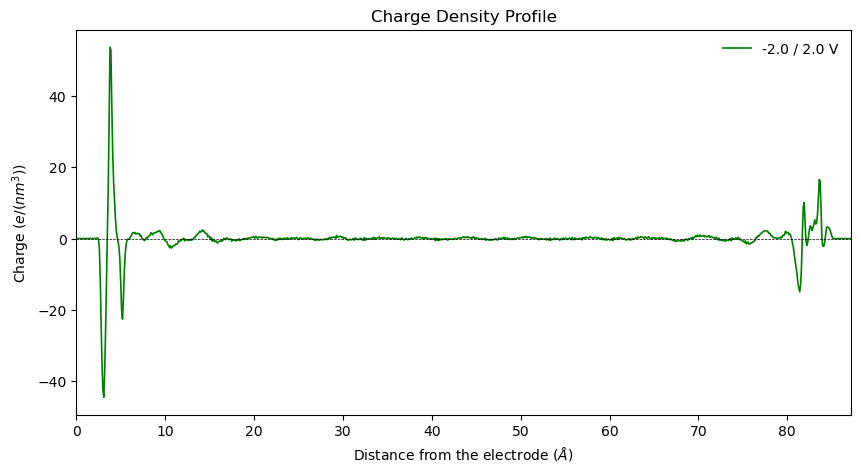

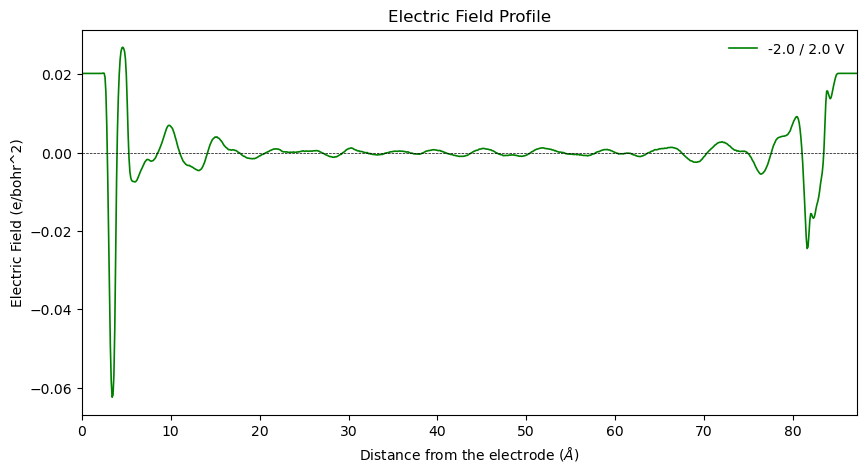

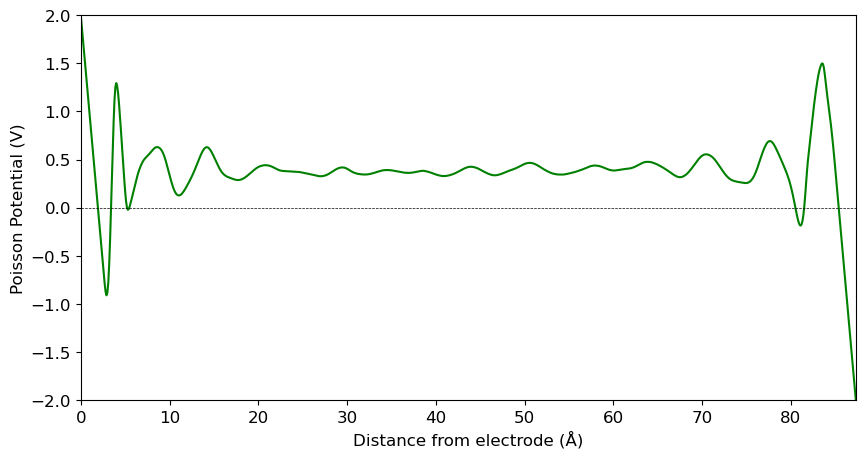

{'v4_cat': ([2.0], [1.6076949583640006]), 'v4_an': ([-1.9936882598974262], [-2.385993301533426])}


In [4]:
pdb_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/start_drudes.pdb'
dcd_v0 = '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/FV_NVT.dcd'
u= mda.Universe(pdb_v0, dcd_v0)
grp_A_list = [u.select_atoms('resname grp and segid A and name C1') for u in u_list]
grp_B_list = [u.select_atoms('resname grp and segid B and name C1') for u in u_list]
grp_A_pos = grp_A_list[0].positions[:, 2]
grp_B_pos = grp_B_list[0].positions[:, 2]
electrode_z_positions= (grp_A_pos, grp_B_pos)

# num_bins=120
Lcell = max(grp_B_pos) - max(grp_A_pos)

bin_width = 0.1
# bin_width = Lcell/num_bins

n_bins = int(Lcell/bin_width)

# hist_range = (min(grp_B_pos) - dmax , min(grp_B_pos))
dz = bin_width
L_all = 180.422
V_app = [4.0]
# V_app = [0, 1.0, 2.0, 3.0, 4.0]
# V_level = [0, 1, 2, 3, 4]
V_level = [4]

Q_cat = [
         # SC_dict['v0_cat'],
         # SC_dict['v0.5_cat'],
         # SC_dict['v1_cat'],
         # SC_dict['v1.5_cat'],
         # SC_dict['v2_cat'],
         # SC_dict['v2.5_cat'],
         # SC_dict['v3_cat'],
         # SC_dict['v3.5_cat'],
         SC_dict['v4_cat'],
         
]
print(Q_cat)


V_init = [(V_init_i)/2 for V_init_i in V_app ]
NTCV = [
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v0_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v0.5_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v1_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v1.5_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v2_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v2.5_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3_ns100/AnaRes/normalized_total_charge.dat',
    # '../sim_output_dir/400[N1113][TFSI]/sim_output_v3.5_ns100/AnaRes/normalized_total_charge.dat',
    '../sim_output_dir/400[N1113][TFSI]/sim_output_v4_ns100/AnaRes/normalized_total_charge.dat',
      ]

NTC_list=[]

for i in range(len(NTCV)):
    NTCV_list = NTC(NTCV[i])
    NTCV_lists = NTCV_list.NTCV_list()
    NTC_list.append(NTCV_lists)

colors = ['g']
          
# linestyles= ['--', '--', '--', '-', '-', '-']
linestyles= ['-']


# pos_pot = pospot(u, dz, L_all, V_app, Q_cat, V_init, NTC_list, electrode_z_positions, n_bins, bin_width)
pos_pot = pospot(u, dz, L_all, V_app, Q_cat, V_init, NTC_list, electrode_z_positions, n_bins, bin_width)
pos_pot.plot_pospot(colors, linestyles)

V_drop_dict = {}
for i, V_level in enumerate(V_level):
    pos_pot_i = pospot(u, dz, L_all, [V_level], [Q_cat[i]], [V_init[i]], [NTC_list[i]], electrode_z_positions, n_bins, bin_width)
    V_cat, V_anode, V_mid, V_drop_cat, V_drop_anode = pos_pot_i.cal_V_drop()
    V_drop_dict[f'v{V_level}_cat'] = (V_cat, V_drop_cat)
    V_drop_dict[f'v{V_level}_an'] = (V_anode, V_drop_anode)

print(V_drop_dict)